# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Для определения рыночной стоимости объектов недвижимости необходимо провести исследовательский анализ данных и установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

___Основые задачи исследования:___
1. Изучение основных параметров объектов.
2. Определение стандартного времени, затрачиваемого на продажу, а также временных границ для определения быстрых и очень медленных продаж.
3. Выявление факторов, которые больше всего влияют на общую стоимость объекта.
4. Анализ стоимости квадратного метра в 10 населенных пунктах с наибольшим числом объявлений.
5. Анализ зависимости стоимости объектов от расстояния до центра города для г.Санкт-Петербурга.


___План проведения исследования:___
1. Загрузка данных, изучение общей информации о данных и их структуре:
    - загрузка данных, просмотр фрагмента данных
    - получение общей информации
    - построение гистограмм для числовых данных
2. Предобработка данных
    - работа с пропусками
    - изучение типов данных, их преобразование (в случае необходимости)
    - поиск дубликатов
3. Добавление вспомогательных столбцов
4. Исследовательский анализ данных
    - изучение основных параметров, удаление выбросов
    - изучение времени продажи квартир
    - выявление факторов, влияющих на стоимость квартир
    - изучение стоимости квадратного метра в 10 населенных пунктах с наибольшим числом объявлений
    - изучение зависимости стоимости квартир от расстояния до центра города (для г.Санкт-Петербурга)
5. Общий вывод





### Загрузка и обзор данных

In [1]:
#!pip install -q phik

In [ ]:
# импорт необходимых для проекта библиотек
import matplotlib.pyplot as plt  #
import pandas as pd 
from phik import phik_matrix 

In [ ]:
data = pd.read_csv('/datasets/apartment_sales_data.csv', sep='\t')

Выведем первые 10 строк данных.

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Получим общую информацию о данных.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистрограммы для числовых столбцов таблицы.

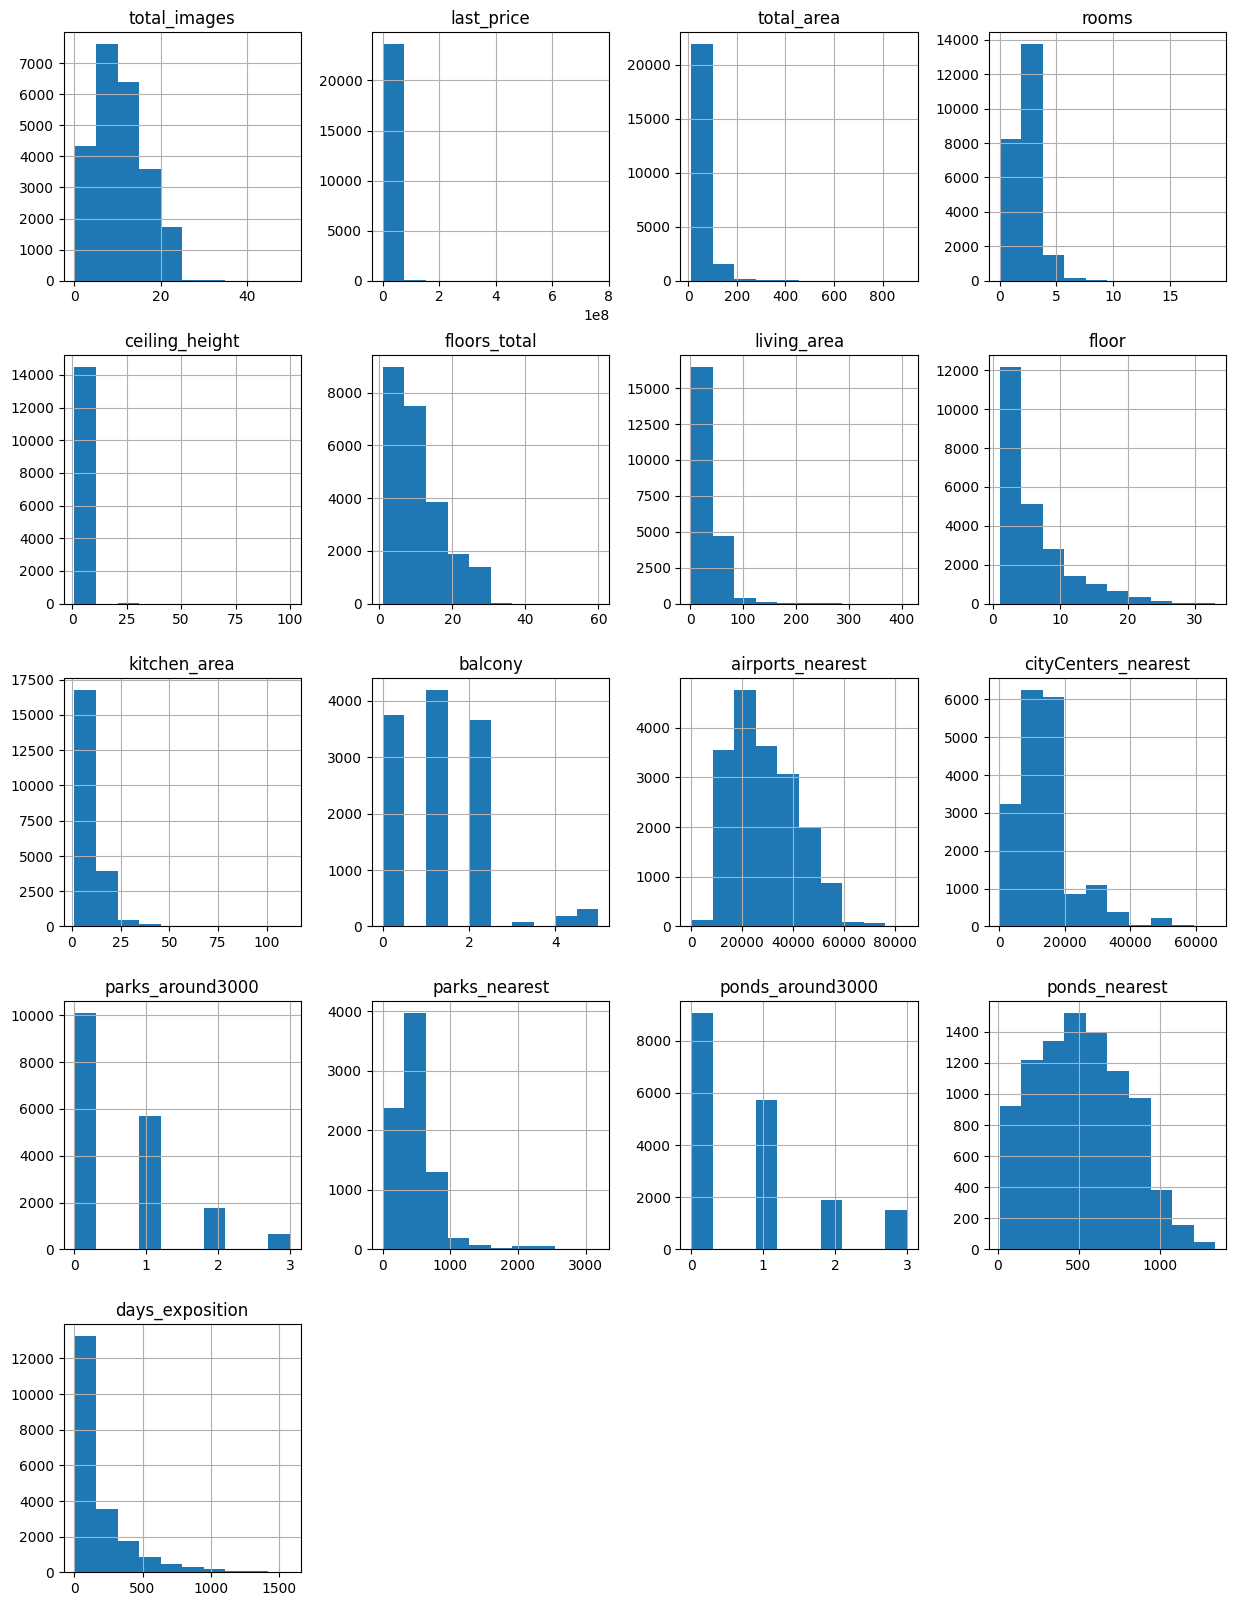

In [6]:
data.hist(figsize=(15, 20)); # вывод гистограмм

Промежуточный вывод: 
- в данных много пропусков, в том числе в значениях, которые не вносятся пользователем;
- некоторые типы данных не соответствуют хранимому значению;
- в данном масштабе на диаграммах отсутствуют подозрительные пиковые значения;
- разброс значений для высоты потолков выглядит нереалистичным.

### Предобработка данных

### Переименование столбцов

Необходимо использовать змеиный стиль в названиях столбцов.

In [7]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Работа с пропущенными значениями

Изучив общую информацию о данных, а также просмотрев первые строки данных, можно сделать вывод о наличии пропусков. Определим количество пропущенных значений для каждого столбца.

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Для наглядности отобразим информацию о доле пропущенных значениях на графике.

In [9]:
def pass_value_barh(dfg):
    """
    Функция для вывода пропущенных значений в виде столбчатой диаграммы
    Параметры:
    dfg - датафрейм    
    """
    try:
        plot = (
            (dfg.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16, grid = True)
        )
        plot.set_title('Пропущенные значения (% от общего числа) ' + "\n", fontsize = 22)
        plot.set_xlabel("Процент пропущенных значений", fontsize=18)
        plot.set_ylabel("Столбцы с пропусками", fontsize=16)
        plot.set_xlim(0, 100)

    except:
        print('Пропусков не осталось или произошла ошибка в первой части функции')

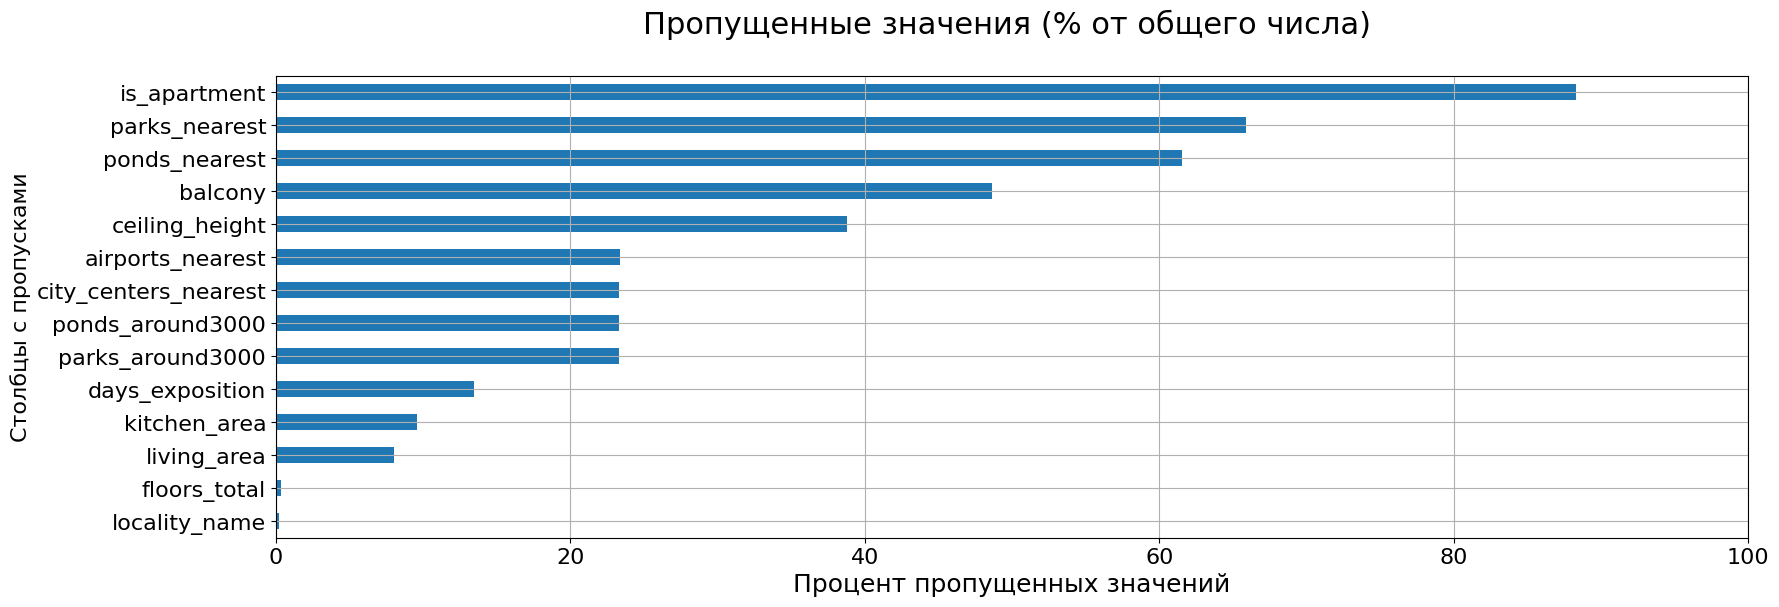

In [10]:
pass_value_barh(data)

Пропуски обнаружены в 14 из 22 столбцах, причем в некоторых столбцах количество пропусков составляет значительную часть от всех данных. Рассмотрим по порядку каждый из столбцов.

#####  Cтолбец `balcony`
Cтолбец `balcony` содержит информацию о числе балконов. Логично предположить, что в данном случае пропуски означают их отсутствие. Заменим все пропущенные значения на 0.

In [11]:
data['balcony'] = data['balcony'].fillna(0)

#####  Cтолбец `is_apartment`

Cтолбец `is_apartment` содержит информацию о том, является ли недвижимость апартаментами. Можно предположить, что пропуски в данном столбце означают, что недвижимость не является апартаментами, а относится к жилым помещениям. Заполним пропуски в столбце `is_apartment` значением "False" (согласно описанию данных, значения в указанном столбце представляют собой булев тип).

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(False)

#####  Cтолбец `ceiling_height` 

Cтолбец `ceiling_height` содержит информацию о высоте потолков, указанную в метрах (количественная переменная).

Проверим наличие зависимости между высотой потолков, расстоянием до центра, этажностью. Данные о том, является ли квартира апартаментами, использовать не будем, т.к. апартаментов в датасете очень мало.

In [13]:
# проверим некоторые зависимости перед заполнением пропусков
interval_cols = [
    'ceiling_height', 
    'city_centers_nearest', 
    'floors_total'
]

phik_matrix(
    data[interval_cols].dropna(),  # удаляем пропуски для анализа
    interval_cols=interval_cols
)

,ceiling_height,city_centers_nearest,floors_total
ceiling_height,1.000000,0.000000,0.071632
city_centers_nearest,0.000000,1.000000,0.378563
floors_total,0.071632,0.378563,1.000000


In [14]:
median_ceiling_height = data['ceiling_height'].median()
median_ceiling_height

2.65

Явных зависимостей не выявлено. Заполним пропуски в столбце `ceiling_height` медианным значением.

In [15]:
data['ceiling_height'] = data['ceiling_height'].fillna(median_ceiling_height)

#####  Cтолбец `locality_name` 

В данном столбце содержится информация о названии населенного пункта. Заполним пропуски значением 'unknown'.

In [16]:
# проверим, есть ли такое значение в исходных данных
data.loc[data['locality_name'] == 'unknown']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [17]:
# заполняем пропущенные значения
data['locality_name'] = data['locality_name'].fillna('unknown')

##### Пропуcки в других столбцах

Проверим предположения о пропусках в некоторых столбцах, значения в которых вычислены автоматически.

Возможно, если нет ни одного водоема или парка в радиусе 3 км, в таблице значение пропущено. Проверим, содержат ли столбцы `parks_around3000`, `ponds_around3000` нулевые значения.

In [18]:
data[(data['parks_around3000'] == 0)].shape[0]

10106

In [19]:
data[(data['ponds_around3000'] == 0)].shape[0]

9071

Наше предположение не подтвердилось, поэтому заполнять нулями пропущенные значения для данных столбцов не будет правильным решением. 

Проверим еще одно предположение: если в радиусе 3 км нет парков/водоемов, в соответствующей колонке, содержащей  информацию о расстоянии до ближайшего парка/водоема возникает пропуск в данных.

In [20]:
data[(data['ponds_around3000'] == 0)]['ponds_nearest'].value_counts(dropna=False).to_frame()

,count
ponds_nearest,
NaN,9071


In [21]:
data[data['parks_around3000'] == 0]['parks_nearest'].value_counts(dropna=False).to_frame()

,count
parks_nearest,
NaN,10102
3190.0,2
3064.0,1
3013.0,1


Исходя из результатов проверки для информации о парках, второе предположение также не подтвердилось.

Не представляется возможным сделать логичную замену для пропусков в следующих столбцах:
- `floors_total` - всего этажей в доме
- `living_area` - жилая площадь в квадратных метрах (м²)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)       
- `city_centers_nearest` — расстояние до центра города (м)    
- `parks_around3000` — число парков в радиусе 3 км    
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км    
- `ponds_nearest` — расстояние до ближайшего водоёма (м)   
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

#####  Возможные причины пропусков

Пропуски в данных, которые должны были быть получены автоматически на основе картографических данных, могли возникнуть по следующим причинам:
- не удалось установить точное местоположение  квартиры и вычислить соответствующие значения;
- возникли технические проблемы при работе с геосервисами;
- по иным техническим причинам (во время выгрузки данных, копирования, считывания, сохранения информации).
Пропуски в столбце, содержащем информацию о  количестве дней, в течение которых размещалось объявление, также были вызваны  техническими причинами.

Пропуски в данных, которые должны были быть вписаны пользователем (количество этажей в доме, жилая площадь в квадратных метрах,  площадь кухни в квадратных метрах, название населённого пункта), могут быть вызваны как техническим причинам, так и человеческим фактором. Если заполнение данных полей не является обязательным для пользователя, он мог просто опустить эти данные, т.к. не знает точной информации либо не хочет ее указывать, полагая, что его объявление без этих данных будет попадать в результаты поиска чаще. В случае пропусков в данных о количестве балконов, а также о том, является ли помещение апартаментами, можно предположить, что пользователи не заполняли поля, если балконов нет и недвижимость не является коммерческой.

#### Работа с типами данных

Изучим подробнее типы данных в датасете, для этого снова посмотрим на общую информации о данных.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Изучив описание данных, приходим к выводу, что некоторые типы данных в столбцах нужно изменить. 

Дата публикации должна быть приведена к типу, подходящему для хранения даты и времени. Опираясь на значения, которые содержатся в первых строках данного столбца (к примеру "2015-08-20T00:00:00"), определим формат, в котором записаны данные. Преобразуем информацию в столбце `first_day_exposition` к типу, подходящему для хранения даты и времени. 

In [23]:
# заменим тип данных в столбце 'first_day_exposition' на datetime
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

Очевидно, что значения в столбцах, содержащих информацию о количестве балконов, этажей, парков, водоемов, а также о количестве дней, будут являться целыми числами и должны относиться к целочисленному типу, однако они определены как вещественный тип. В связи с наличием пропусков в данных о количестве этажей, парков, водоемов и количестве дней преобразовать значения к типу int невозможно. Пропуски отсутствуют только в данных о количестве балконов. Приведем указанные данные к целочисленному типу.

In [24]:
# изменяем тип данных в столбце 'balcony' на int 
data['balcony'] = data['balcony'].astype('int')

Все возможные изменения в типах данных были осуществлены. 

Данные необходимо переводить в подходящий формат для возможности корректного проведения исследований и рассчетов (например, если даты будут определены как строковый тип данных, мы не сможем проводить с ними проводить операции, предусмотренные для работы с данными в формате datetime). Также при хранении целых чисел в вещественном формате может произойти потеря точности. 

#### Устранение дубликатов

Проверим наличие явных дубликатов в данных.

In [25]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено. Для поиска неявных дубликатов изучим значения в столбце с названиями населённого пункта. 

In [26]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Т.к. исходными данными для нашего исследования являются объявления о продажах в территориально близко расположенных населенных пунктах, велика вероятность того, что населенные пункты с одинаковым названием, но разным типом (либо при отсутсвии информации о нем), являются одним и тем же населенным пунктом. Примем это допущение для нашего исследования.  

Создадим новый столбец `short_locality_name`, в котором будем хранить названия населенных пунктов без дубликатов. Для этого приведем все к верхнему регистру на случай, если вдруг при внесении информации пользователем он по ошибке одну из букв написал не в соответствующем регистре,  осуществим замену "Ё" на "Е" для однообразия написания, а также удалим из названий информацию о типе населенного пункта (поселок, деревня, городской поселок, село, поселок городского типа, поселок при железнодорожной станции, садовое товарищество, поселок станции, городской поселок, садоводческое некоммерческое товарищество), т.к. она может быть внесена не верно или отсутствовать, либо же тип населенного пункта мог измениться с течением времени.

In [27]:
# регулярное выражение для поиска подстроки, содержащей тип населенного пункта
pattern = ('ДЕРЕВНЯ |СЕЛО |(ГОРОДСКОЙ )?(КОТТЕДЖНЫЙ )?ПОСЕЛОК( ГОРОДСКОГО ТИПА)?( СТАНЦИИ)?( ПРИ ЖЕЛЕЗНОДОРОЖНОЙ СТАНЦИИ)? '
    '|ГОРОД |(САДОВОЕ )?(САДОВОДЧЕСКОЕ )?(НЕКОММЕРЧЕСКОЕ )?ТОВАРИЩЕСТВО ')

data['short_locality_name'] = (
    data['locality_name']
    .str.upper()
    .str.replace('Ё', 'Е', case=False)
    .replace(pattern, '', regex=True)
)

Убедимся, что в столбце `short_locality_name` содержатся названия населенных пунктов, записанные в верхнем регистре, без указания типа населенного пункта.

In [28]:
data['short_locality_name'].unique()

array(['САНКТ-ПЕТЕРБУРГ', 'ШУШАРЫ', 'ЯНИНО-1', 'ПАРГОЛОВО', 'МУРИНО',
       'ЛОМОНОСОВ', 'СЕРТОЛОВО', 'ПЕТЕРГОФ', 'ПУШКИН', 'КУДРОВО',
       'КОММУНАР', 'КОЛПИНО', 'КРАСНЫЙ БОР', 'ГАТЧИНА', 'ФЕДОРОВСКОЕ',
       'ВЫБОРГ', 'КРОНШТАДТ', 'КИРОВСК', 'НОВОЕ ДЕВЯТКИНО',
       'МЕТАЛЛОСТРОЙ', 'ЛЕБЯЖЬЕ', 'СИВЕРСКИЙ', 'МОЛОДЦОВО',
       'КУЗЬМОЛОВСКИЙ', 'НОВАЯ РОПША', 'ПАВЛОВСК', 'ПИККОЛОВО',
       'ВСЕВОЛОЖСК', 'ВОЛХОВ', 'КИНГИСЕПП', 'ПРИОЗЕРСК', 'СЕСТРОРЕЦК',
       'КУТТУЗИ', 'АННИНО', 'ЕФИМОВСКИЙ', 'ПЛОДОВОЕ', 'ЗАКЛИНЬЕ',
       'ТОРКОВИЧИ', 'ПЕРВОМАЙСКОЕ', 'КРАСНОЕ СЕЛО', 'ПОНТОННЫЙ',
       'СЯСЬСТРОЙ', 'СТАРАЯ', 'ЛЕСКОЛОВО', 'НОВЫЙ СВЕТ', 'СЛАНЦЫ',
       'ПУТИЛОВО', 'ИВАНГОРОД', 'ШЛИССЕЛЬБУРГ', 'НИКОЛЬСКОЕ',
       'ЗЕЛЕНОГОРСК', 'СОСНОВЫЙ БОР', 'ОРЖИЦЫ', 'КАЛЬТИНО', 'РОМАНОВКА',
       'БУГРЫ', 'РОЩИНО', 'КИРИШИ', 'ЛУГА', 'ВОЛОСОВО', 'ОТРАДНОЕ',
       'ПАВЛОВО', 'ОРЕДЕЖ', 'КОПОРЬЕ', 'МОЛОДЕЖНОЕ', 'ТИХВИН', 'ПОБЕДА',
       'НУРМА', 'СИНЯВИНО', 'ТОСНО', 'СТРЕЛЬНА', 'БОКСИТОГОРСК',

Сравним количество уникальных значений исходного столбца и  столбца с короткими названиями населенных пунктов.

In [29]:
# выведем количество уникальных значений столбца с полными названиями населенных пунктов
data.locality_name.nunique()

365

In [30]:
# выведем количество уникальных значений столбца с короткими названиями населенных пунктов
data.short_locality_name.nunique()

306

Столбец с полными названиями населенных пунктов содержит 365 уникальных значений, а созданный нами столбец с короткими названиями - всего 306. Одно из значений было добавлено нами - "unknown".

Повторим поиск дубликатов. В этот раз попробуем найти неявные дубликаты по сумме ключевых параметров: 
-  общая площадь квартиры, 
-  жилая площадь, 
-  площадь кухни,
-  число комнат,
-  число балконов,
-  этажность дома,
-  этаж,
-  является ли квартирой-студией,
-  свободная планировка,
-  расстояние до центра города,
-  название населенного пункта (без указания типа).

In [31]:
# список ключевых параметров
params = ['total_area', 'living_area', 'kitchen_area',
          'rooms', 'balcony',
          'floor', 'floors_total',
          'studio', 'open_plan',
          'short_locality_name',
          'city_centers_nearest']

In [32]:
data[data.duplicated(params, keep=False)].sort_values('total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,short_locality_name
22528,9,2950000.0,30.0,2018-09-14,1,2.50,9.0,15.00,4,False,...,0,Красное Село,27591.0,31016.0,0.0,NaN,0.0,NaN,106.0,КРАСНОЕ СЕЛО
17659,2,2850000.0,30.0,2016-05-05,1,2.65,9.0,15.00,4,False,...,0,Красное Село,27591.0,31016.0,0.0,NaN,0.0,NaN,272.0,КРАСНОЕ СЕЛО
12873,5,2050000.0,31.0,2017-12-15,1,2.65,5.0,NaN,2,False,...,0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,39.0,ВЫБОРГ
8660,7,1850000.0,31.0,2018-03-17,1,2.65,5.0,NaN,2,False,...,0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,45.0,ВЫБОРГ
22696,15,1950000.0,33.7,2018-04-13,1,2.65,7.0,18.00,6,False,...,0,деревня Разметелево,NaN,NaN,NaN,NaN,NaN,NaN,193.0,РАЗМЕТЕЛЕВО
16714,15,1950000.0,33.7,2018-06-11,1,2.60,7.0,18.00,6,False,...,0,деревня Разметелево,NaN,NaN,NaN,NaN,NaN,NaN,131.0,РАЗМЕТЕЛЕВО
12525,11,3480000.0,35.0,2017-10-06,1,2.65,22.0,16.00,20,False,...,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,44.0,КУДРОВО
9492,9,3250000.0,35.0,2016-03-31,1,2.70,22.0,16.00,20,False,...,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,750.0,КУДРОВО
13896,14,3650000.0,38.0,2017-11-03,1,2.65,22.0,18.00,5,False,...,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,10.0,КУДРОВО
3634,11,3550000.0,38.0,2017-06-02,1,2.65,22.0,18.00,5,False,...,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,18.0,КУДРОВО


Потенциально это могут быть объявления о продаже одних и тех же квартир (одинаковые техничеcкие характеристики + название населенного пункта (без указания типа) + геоданные, представленные расстоянием до центра города, если указаны), размещенные в разное время. Одной из причин появления таких дубликатов мог стать человеческий фактор: повторное размещение объявления с целью показа в верхних позициях результов поиска сервиса. Однако вполне возможно, что публиковали объявления о продаже одинаковых квартир из соседних подъездов. Добавим к сумме колонок дату публикации объявления.

In [33]:
data[data.duplicated(params + ['first_day_exposition'], keep=False)].sort_values('total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,short_locality_name
1809,6,5400000.0,68.8,2018-11-16,2,2.75,22.0,35.55,16,False,...,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,24.0,МУРИНО
18579,1,5400043.0,68.8,2018-11-16,2,2.75,22.0,35.55,16,False,...,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,20.0,МУРИНО
12376,3,18206548.0,139.5,2018-07-04,4,3.30,16.0,82.55,9,False,...,0,Санкт-Петербург,37434.0,8460.0,1.0,441.0,2.0,427.0,NaN,САНКТ-ПЕТЕРБУРГ
23516,3,22529250.0,139.5,2018-07-04,4,3.30,16.0,82.55,9,False,...,0,Санкт-Петербург,37434.0,8460.0,1.0,441.0,2.0,427.0,266.0,САНКТ-ПЕТЕРБУРГ


In [34]:
# удаляем дубликаты
data = data.drop_duplicates(subset=params + ['first_day_exposition'], keep='first')

Промежуточный вывод:
* В данных присутствует большое количество пропущенных значений. Заполнены пропуски в данных о количестве балконов, о том, является ли недвижимость аппартаментами, о высоте потолков, о названиях населенных пунктов. Пропуски в данных о количестве этажей в доме, жилой площади, площади кухни, а также в данных, автоматически получаемых из геосервисов, не заполнялись. 
* Данные о количестве балконов приведены к целочисленному типу, данные о дате публикации - к типу datetime.
* Данные проверены на наличие дубликатов. Для устранения неявных дубликатов добавлен столбец, содержащий названия населенных пунктов, записанные в верхнем регистре, без указания типа населенного пункта, для единообразия написания все 'ё' заменены на 'е'. Это позволило сократить количество уникальных значений населенных пунктов с 365 до 306. Удалены дубликаты, выявленные по сумме ключевых параметров.

### Добавление новых столбцов

Вычислим цену одного квадратного метра, разделив стоимость объекта на его общую площадь, результат округлим до 2 знаков после запятой. Для хранения вычисленных значений создадим столбец `price_per_square_meter`. 

In [35]:
data['price_per_square_meter'] = round(data['last_price'] / data['total_area'], 2)

Также добавим столбцы `first_day_exposition_day_of_the_week`, `first_day_exposition_mounth`, `first_day_exposition_year`, содержащие соответственно день недели (0 — понедельник, 1 — вторник и так далее), месяц и год публикации объявления.

In [36]:
data['first_day_exposition_day_of_the_week'] = pd.DatetimeIndex(data['first_day_exposition']).weekday 
data['first_day_exposition_mounth'] = pd.DatetimeIndex(data['first_day_exposition']).month 
data['first_day_exposition_year'] = pd.DatetimeIndex(data['first_day_exposition']).year 

Для данных о типе этажа квартиры определим следующие категории:
- подвал;
- первый;
- последний;
- средний.

In [37]:
def floor_type(row):
    """
    Возвращает тип этажа квартиры в зависимости от номера этажа.

    Параметры:
        row (pd.Series): Строка DataFrame, содержащая:
            - 'floor' (int): номер этажа квартиры
            - 'floors_total' (int): общее количество этажей в доме

    Возвращает:
        str: Категория этажа:
            - 'подвал' - если номер этажа ≤ 0 (включая подвальные этажи)
            - 'первый' - если этаж 1
            - 'последний' - если этаж равен общему количеству этажей
            - 'средний' - в остальных случаях
    """    
    if row['floor'] <= 0:
        return 'подвал'
    elif row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else: 
        return 'средний'

In [38]:
# получим список уникальных значений для этажа квартиры
data['floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

In [39]:
# получим список квартир, расположенных на 1 этаже одноэтажных домов
data[(data['floor'] == data['floors_total']) & (data['floor'] == 1)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,short_locality_name,price_per_square_meter,first_day_exposition_day_of_the_week,first_day_exposition_mounth,first_day_exposition_year
3076,20,2000000.0,80.0,2018-01-03,3,2.65,1.0,48.5,1,False,...,NaN,NaN,NaN,NaN,44.0,ВОЛОСОВО,25000.00,2,1,2018
4379,5,5300000.0,58.5,2017-11-15,2,2.65,1.0,31.6,1,False,...,NaN,NaN,NaN,NaN,226.0,РОЩИНО,90598.29,2,11,2017
5300,5,2990000.0,60.0,2018-11-15,3,2.65,1.0,50.0,1,False,...,NaN,NaN,NaN,NaN,40.0,ВЕЩЕВО,49833.33,3,11,2018
5698,7,450000.0,42.0,2017-07-31,2,2.65,1.0,23.0,1,False,...,NaN,NaN,NaN,NaN,233.0,БУДОГОЩЬ,10714.29,0,7,2017
5787,16,9000000.0,88.0,2018-08-06,3,2.65,1.0,NaN,1,False,...,0.0,NaN,1.0,792.0,60.0,САНКТ-ПЕТЕРБУРГ,102272.73,0,8,2018
7962,4,550000.0,46.2,2018-04-20,3,2.65,1.0,NaN,1,False,...,NaN,NaN,NaN,NaN,45.0,ЛУГА,11904.76,4,4,2018
8335,10,2700000.0,80.0,2018-07-07,3,3.00,1.0,45.0,1,False,...,NaN,NaN,NaN,NaN,51.0,ЛУГА,33750.00,5,7,2018
8388,20,3550000.0,48.2,2019-03-30,3,2.65,1.0,33.9,1,False,...,0.0,NaN,0.0,NaN,NaN,СЕСТРОРЕЦК,73651.45,5,3,2019
9517,4,1200000.0,39.4,2018-01-08,2,2.65,1.0,NaN,1,False,...,NaN,NaN,NaN,NaN,45.0,ГАВРИЛОВО,30456.85,0,1,2018
9752,16,850000.0,62.0,2018-11-10,2,2.65,1.0,31.0,1,False,...,NaN,NaN,NaN,NaN,NaN,СИЖНО,13709.68,5,11,2018


В столбце `floor` нет пропущенных значений, а в столбце `floors_total` всего 86 из 23699. Поэтому в случае, когда этаж не является первым, определение типа этажа для таких квартир как "средний" не приведет к искажению данных. Также стоит отметить, что в выборке незначительное количество объектов (25), расположенных на первом этаже одноэтажных зданий. Для них будет установлена категория "первый". Объектов, расположенных на нулевом или отрицательных этажах, в данной выборке нет.

Добавим столбец `floor_type`, в котором будет содержаться тип этажа квартиры.

In [40]:
data['floor_type'] = data.apply(floor_type, axis = 1)

Добавим столбец `city_centers_nearest_km`, в котором будем хранить расстояние до центра города в километрах. 
Для этого используем данные из столбца `city_centers_nearest` (переведем из м в км и округлим до ближайших целых значений).

In [41]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000, 0)

Посмотрим на первые строки таблицы, чтобы удостовериться, что данные записаны.

In [42]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,short_locality_name,price_per_square_meter,first_day_exposition_day_of_the_week,first_day_exposition_mounth,first_day_exposition_year,floor_type,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,САНКТ-ПЕТЕРБУРГ,120370.37,3,3,2019,средний,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0.0,NaN,81.0,ШУШАРЫ,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,2.0,574.0,558.0,САНКТ-ПЕТЕРБУРГ,92785.71,3,8,2015,средний,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,3.0,234.0,424.0,САНКТ-ПЕТЕРБУРГ,408176.10,4,7,2015,средний,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,САНКТ-ПЕТЕРБУРГ,100000.00,1,6,2018,средний,8.0


Промежуточный вывод:

В таблицу добавлены новые параметры: цена одного квадратного метра; день публикации объявления (0 - понедельник, 1 - вторник и т. д.); месяц публикации объявления;  год публикации объявления; тип этажа квартиры («первый», «последний», «средний», «подвал»); расстояние до центра города в километрах.

### Исследовательский анализ данных

#### Изучение параметров объектов

***Общая площадь***

Построим гистограмму для данных об общей площади.

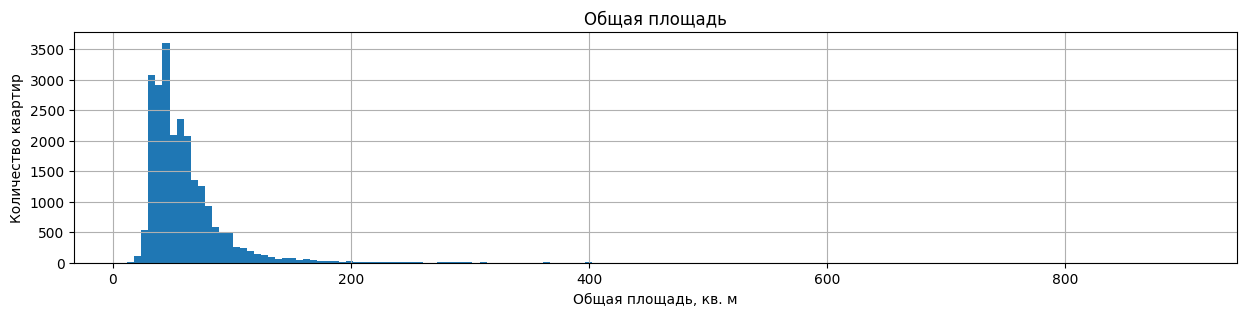

In [43]:
data.plot(
    kind='hist',
    y='total_area',
    bins=150,
    grid=True,
    figsize=(15,3),
    title='Общая площадь',
    xlabel='Общая площадь, кв. м',
    ylabel='Количество квартир',
    legend=False
);

Взглянем ближе на хвосты гистограммы.

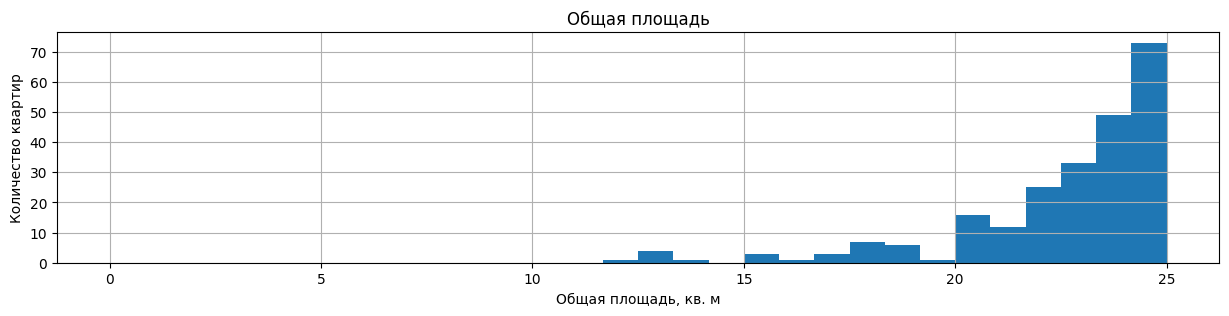

In [44]:
# построим гистограмму для диапазона площади квартиры от 0 до 25 кв. м
(
    data.total_area
    .hist(bins=30, figsize=(15,3), range=(0,25))
    .set(xlabel='Общая площадь, кв. м', ylabel='Количество квартир', title='Общая площадь')
);

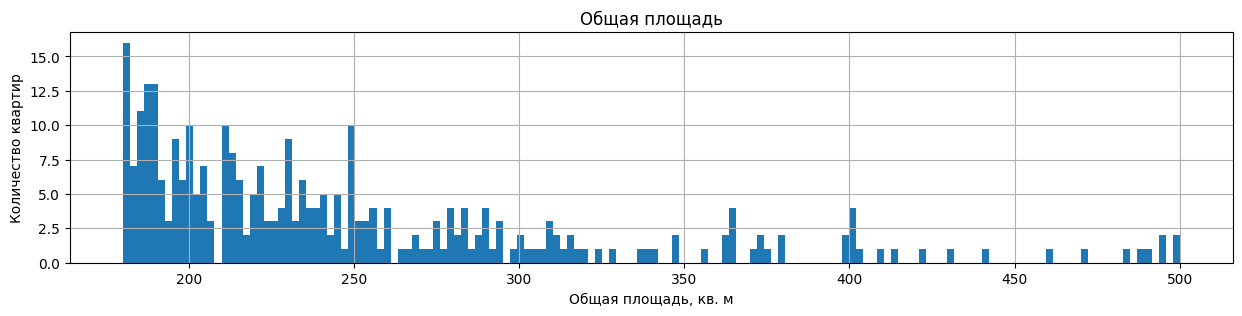

In [45]:
#  построим гистограмму для диапазона площади квартиры от 180 до 500 кв. м
(
    data.total_area
    .hist(bins=150, figsize=(15,3), range=(180,500))
    .set(xlabel='Общая площадь, кв. м', ylabel='Количество квартир', title='Общая площадь')
);

Построим диаграмму размаха и получим описание данных, содержащихся в  столбце `total_area`.

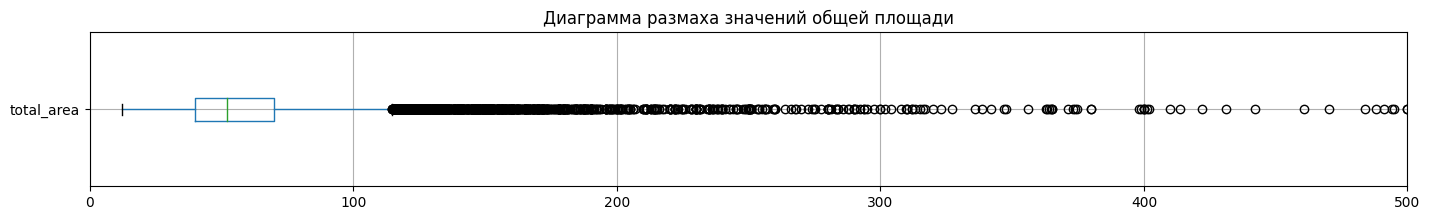

In [46]:
# построим диаграмму размаха
fig, ax = plt.subplots(figsize=(17,2))
ax = data[['total_area']].boxplot(vert=False, ax=ax)
ax.set_title('Диаграмма размаха значений общей площади')
ax.set_xlim(0, 500);

In [47]:
# получим описание данных
data['total_area'].describe()

count    23697.000000
mean        60.344954
std         35.651837
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Из графиков видно, что квартиры с площадью менее 20 кв. м или больше 250 кв. м являются редкостью. Проверим, какую долю составляют такие данные.

In [48]:
((data['total_area'] > 250)  | (data['total_area'] < 20)).mean()

0.005865721399333249

На основании полученной информации, можно сделать вывод, что 50% представленных в выборке квартир имеют общую площадь от 40 до 69.9 кв. м. Медианное значение площади - 52 кв. м (объекты, характеризующиеся площадью, близкой к медианной, могут быть как 2,3-комнатными квартирами старого жилого фонда, так и квартирами из нового, например, 1-комнатными квартирами, студиями, евродвушками). Объекты площадью менее 20 кв. м или более 250 кв. м встречаются довольно редко. Звучит вполне реалистично. Объекты с наибольшей площадью вполне могут оказаться элитными квартирами или коммерческой недвижимостью. Наименьшее значение общей площади - 12 кв. м, наибольшее - 900 кв. м. Внешний вид гистограммы ожидаемый, нет дополнительных пиков значений.  

Доля значений с общей площадью менее 20 кв. м или больше 250 кв. м составляет около 0.6 %, однако они могут оказать негативное влияние в дальнейших расчетах при анализе данных. Это редкие выбивающиеся из общей картины уникальные объекты, по которым нужно проводить отдельную работу. В рамках нашего исследования удалим редкие значения из выборки.

In [49]:
data = data.drop(data[(data['total_area'] > 250) | (data['total_area'] < 20)].index)

***Жилая площадь***

Изучим данные о жилой площади объектов. Для этого построим гистограмму, диаграмму размаха, получим описание данных.

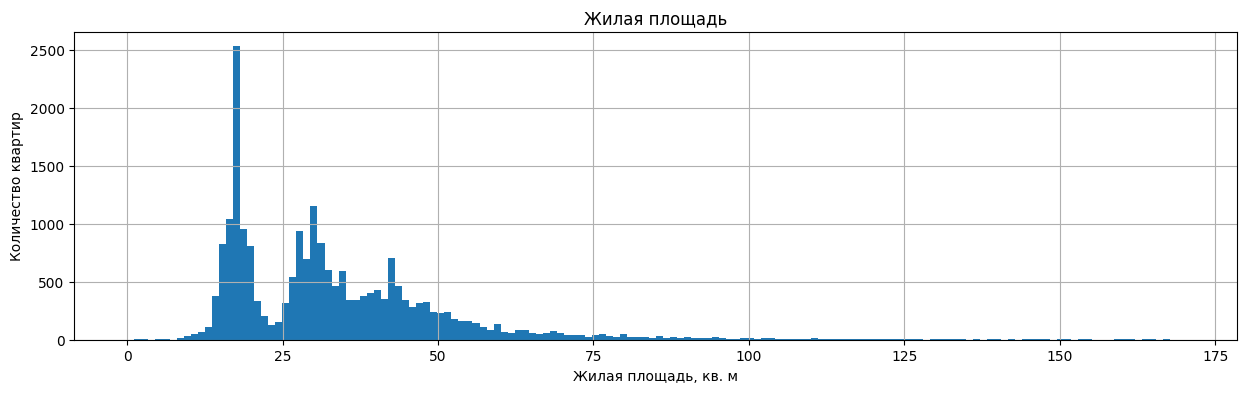

In [50]:
# построим гистограмму, задав диапазон значений 
data.plot(
    kind='hist',
    y='living_area',
    bins=150,
    range=(0, 170),
    figsize=(15,4),
    grid=True,
    title='Жилая площадь',
    xlabel='Жилая площадь, кв. м',
    ylabel='Количество квартир',
    legend=False
);

Построим графики для диапазонов меньших и больших значений жилой площади.

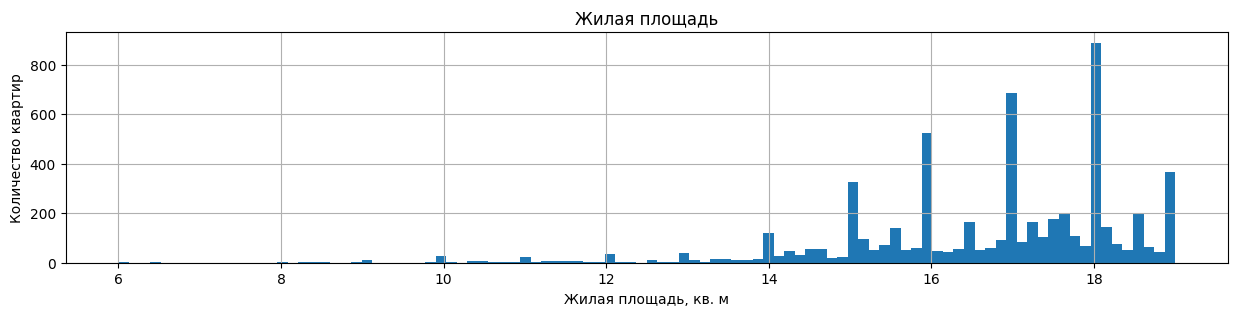

In [51]:
(
    data.living_area
    .hist(bins=100, figsize=(15,3), range=(6,19))
    .set(xlabel='Жилая площадь, кв. м', ylabel='Количество квартир', title='Жилая площадь')
);

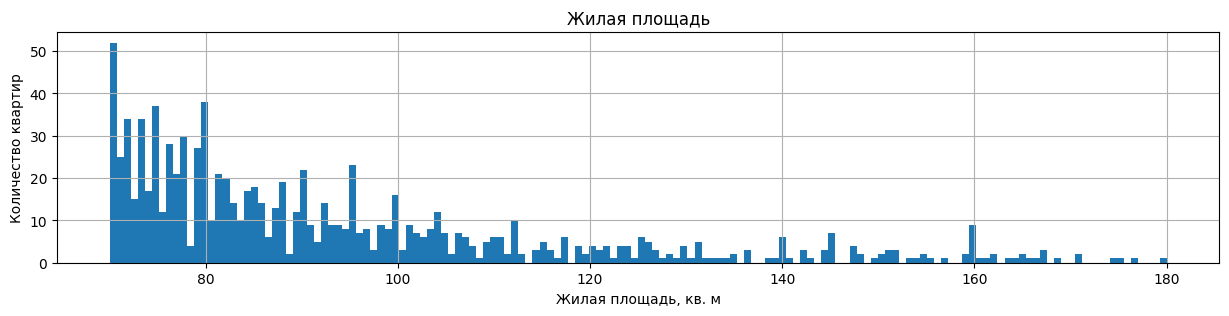

In [52]:
(
    data.living_area
    .hist(bins = 150, figsize = (15,3), range = (70,180))
    .set(xlabel = 'Жилая площадь, кв. м', ylabel = 'Количество квартир', title = 'Жилая площадь')
);

In [53]:
# получим описание данных
data['living_area'].describe()

count    21682.000000
mean        33.780824
std         18.925447
min          2.000000
25%         18.600000
50%         30.000000
75%         42.100000
max        220.000000
Name: living_area, dtype: float64

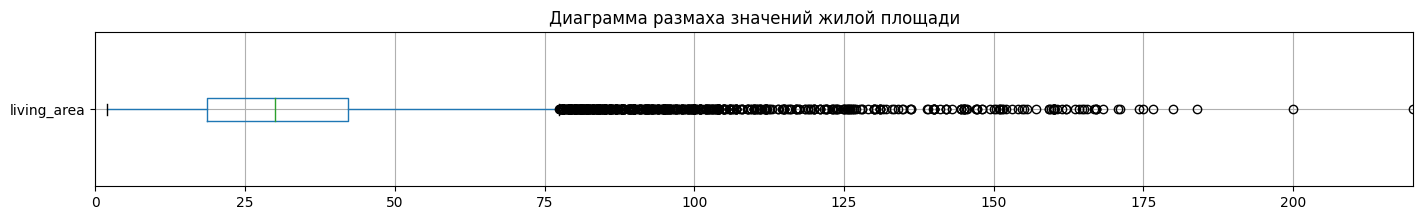

In [54]:
# построим диаграмму размаха
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['living_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений жилой площади')
ax.set_xlim(0, 220);

In [55]:
# определим долю квартир с жилой площадью менее 9 кв. м или более 115 кв. м
((data['living_area'] < 9) | (data['living_area'] > 115)).mean()

0.007046438577128789

Можно сделать вывод, что 50% представленных в выборке квартир имеют жилую площадь от 18.6 до 42.1 кв. м. На гистограмме заметны 3 пика. Можно предположить, что это пики значений для 1, 2, и 3-комнатных квартир соответственно. Максимальное значение жилой площади - 220 кв. м. С учетом того, что в нашей выборке остались лишь квартиры с общей площадью 20 - 250 кв. м, значения выглядят ожидаемо. Вместе с тем, минимальное значение - 2 кв. м, что похоже на аномалию. Квартиры с жилой площадью менее 9 кв. м или более 115 в выборке встречаются редко, их всего 0,7%.  Удалим их из выборки. 

In [56]:
data = data.drop(data[(data['living_area'] < 9) | (data['living_area'] > 115)].index)

***Площадь кухни***

Изучим данные о площади кухни: построим гистограмму, диаграмму размаха, получим описание данных.

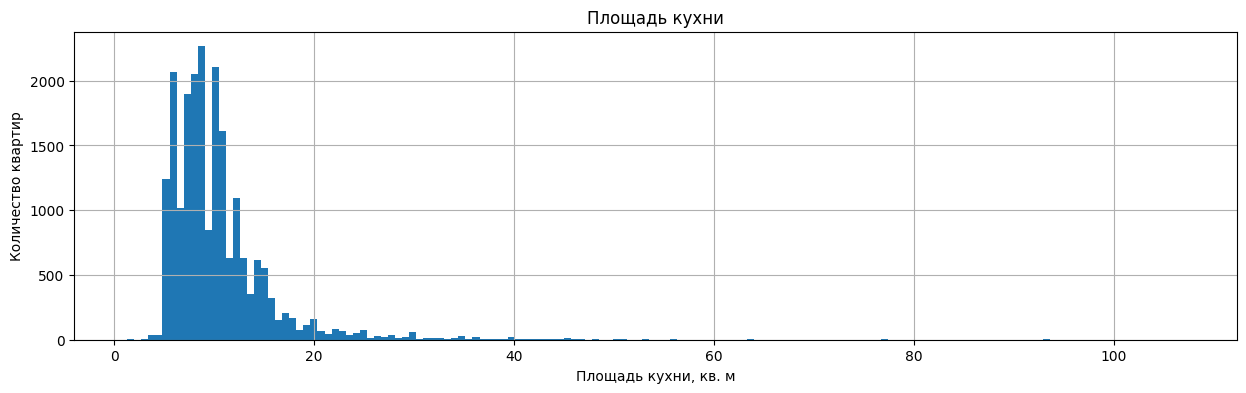

In [57]:
# построим гистограмму
data.plot(
    kind='hist',
    y='kitchen_area',
    bins=150,
    grid=True,
    figsize=(15,4),
    title='Площадь кухни',
    xlabel='Площадь кухни, кв. м',
    ylabel='Количество квартир',
    legend=False
);

Построим гистограммы для диапазонов данных, чтобы изучить хвосты диаграммы.

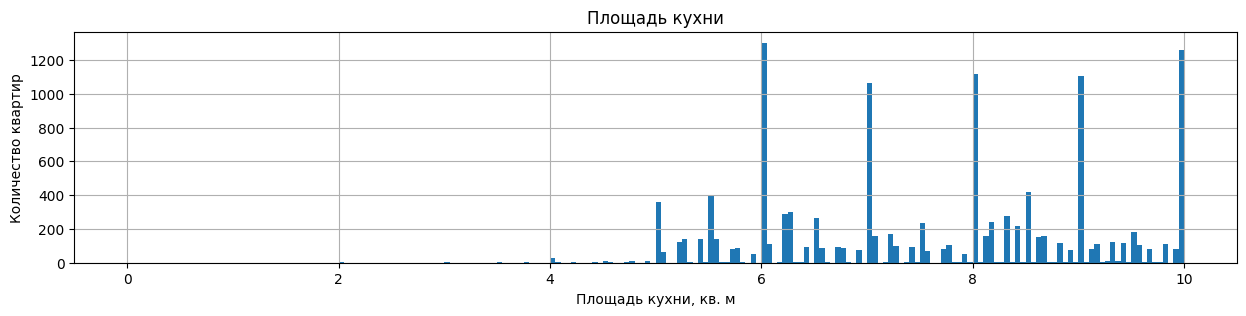

In [58]:
(
    data['kitchen_area']
    .hist(bins = 200, figsize = (15,3), range = (0,10))
    .set(xlabel='Площадь кухни, кв. м', ylabel='Количество квартир', title='Площадь кухни')
);

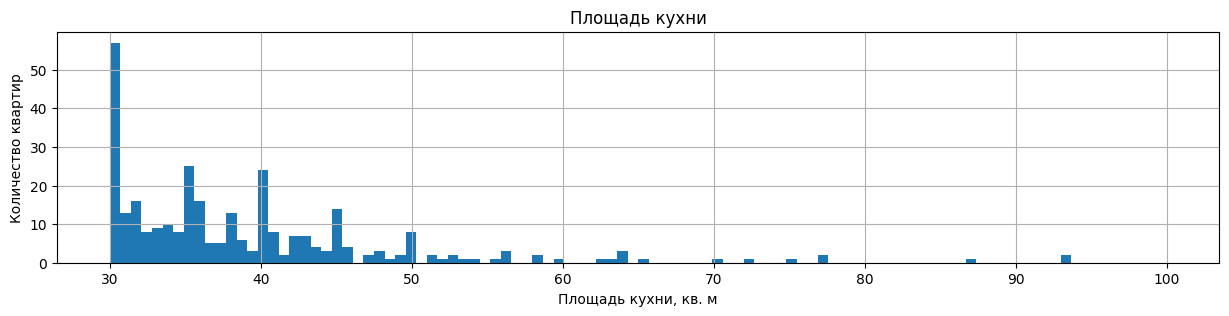

In [59]:
(
    data['kitchen_area']
    .hist(bins = 100, figsize = (15,3), range = (30,100))
    .set(xlabel='Площадь кухни, кв. м', ylabel='Количество квартир', title='Площадь кухни')
);

In [60]:
# получим описание данных
data['kitchen_area'].describe()

count    21163.000000
mean        10.383445
std          5.443308
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max        107.000000
Name: kitchen_area, dtype: float64

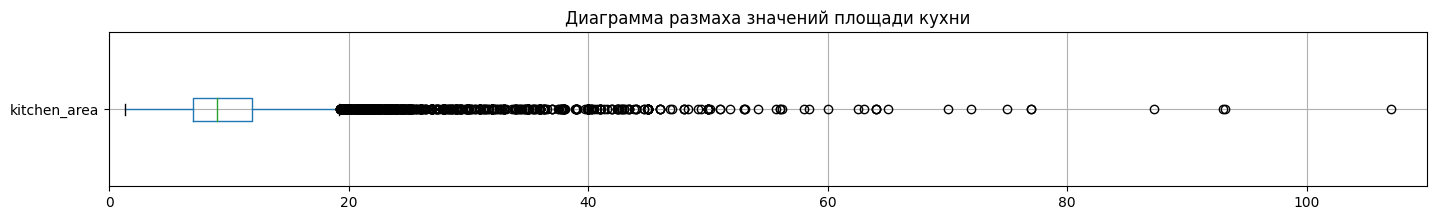

In [61]:
# построим диаграмму размаха
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['kitchen_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади кухни')
ax.set_xlim(0, 110);

Определим долю значений площади кухни менее 5 кв. м или более 50 кв. м

In [62]:
((data['kitchen_area'] > 50) | (data['kitchen_area'] < 5)).mean()

0.0056002051983584135

In [63]:
# найдем самое частое  значение
data['kitchen_area'].mode()

0    6.0
Name: kitchen_area, dtype: float64

Обычно площадь кухни находится в пределах до 20 кв. м. Половина значений - от 7 до 11,9 кв. м, медианное значение - 9 кв. м. Чаще всего встречаются кухни размером 6 кв. м. Распределение вполне ожидаемое. Максимальная площадь кухни в выборке - 107 кв. м. Минимальный размер - 1.3 кв. м (возможно, в случае кухни, совмещенной с жилой комнатой, пользователи вносили данные о площади, занимаемой кухонным гарнитуром). Для нашей выборки значения меньше 5 кв. м или более 50 кв. м являются редкими и составляют 0,6%. Удалим их.

In [64]:
data = data.drop(data[(data['kitchen_area'] < 5) | (data['kitchen_area'] > 50)].index)

***Цена объекта***

Изучим данные о цене объектов: построим гистограмму, получим описание данных.

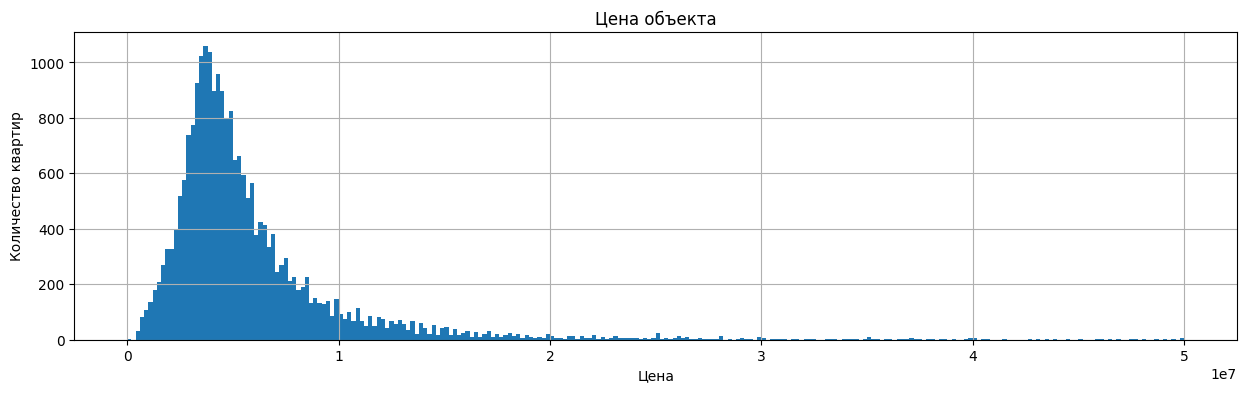

In [65]:
# построим гистограмму, задав диапазон значений
data.plot(
    kind='hist',
    y='last_price',
    bins=250,
    grid=True,
    range=(0,50000000),
    figsize=(15,4),
    title='Цена объекта',
    xlabel='Цена',
    ylabel='Количество квартир',
    legend=False    
);

Изучим хвосты гистограммы.

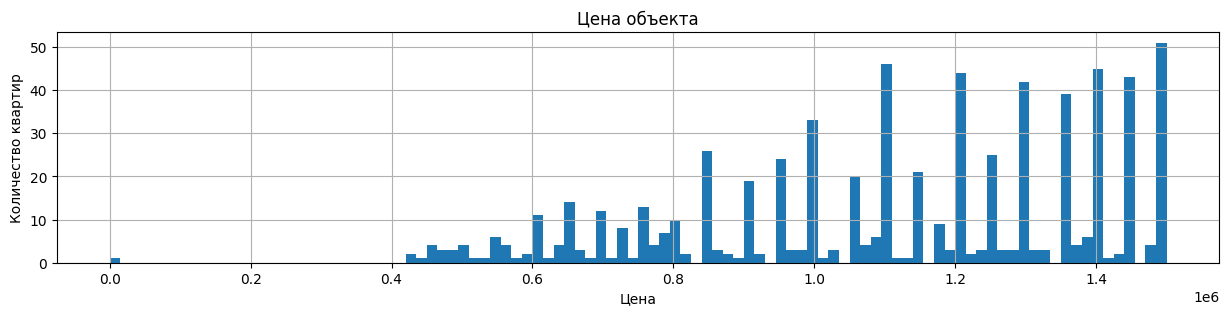

In [66]:
# построим  гистограмму, задав диапазон значений
(
    data['last_price']
    .hist(bins = 100, figsize = (15,3), range = (0,1_500_000))
    .set(xlabel = 'Цена', ylabel = 'Количество квартир', title = 'Цена объекта')
);

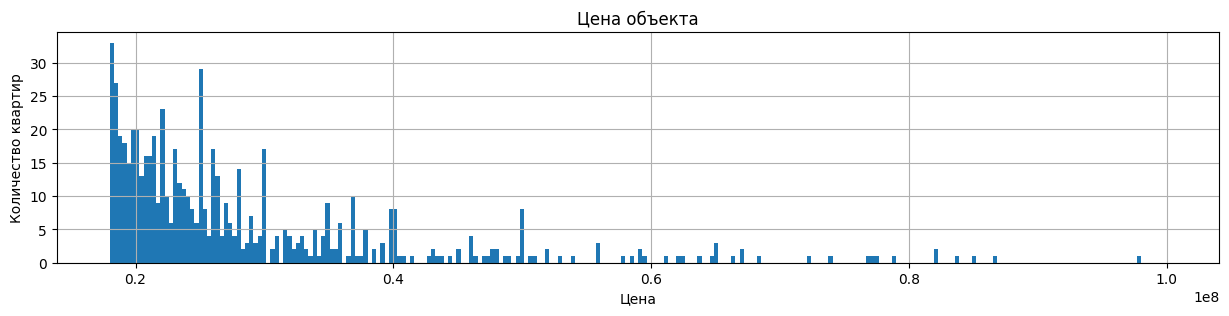

In [67]:
(
    data['last_price']
    .hist(bins = 250, figsize = (15,3), range = (18_000_000, 100_000_000))
    .set( xlabel = 'Цена', ylabel = 'Количество квартир', title = 'Цена объекта')
);

In [68]:
# найдем самое частое значение цены объекта
data['last_price'].mode()

0    4500000.0
Name: last_price, dtype: float64

In [69]:
# получим описание данных
data['last_price'].describe()

count    2.326100e+04
mean     5.981878e+06
std      6.036262e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.690000e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [70]:
((data['last_price']  < 400_000) | (data['last_price'] > 50_000_000)).mean()

0.001848587764928421

Большинство объявлений предлагает цену до 6.69 миллионов, пик значений наблюдается около 4.5 миллионов. Минимальная запрашиваемая цена - 12190, максимальная - 330 миллионов. Удалим редкие значения из выборки, чтобы избежать их влияния на анализ в дальнейшем. В рамках нашего исследования редкими являются значения цены до 400 000, а также превышающие 50 000 000 (составляют 0,2% от общего числа).

In [71]:
data = data.drop(data[(data['last_price']  < 400_000) | (data['last_price'] > 50_000_000)].index)

***Количество комнат***

Изучим данные о количестве комнат. Построим гистограмму и получим описание данных.

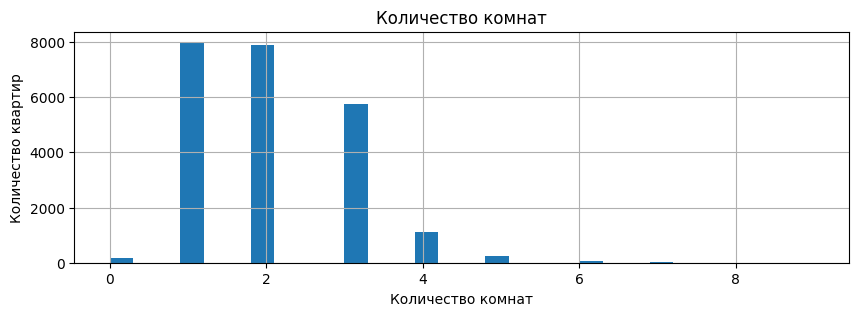

In [72]:
# построим гистограмму
data.plot(
    kind='hist',
    y='rooms',
    bins=30,
    grid=True,
    figsize=(10,3),
    title='Количество комнат',
    xlabel='Количество комнат',
    ylabel='Количество квартир',
    legend=False
);

In [73]:
#получим описание данных
data['rooms'].describe()

count    23218.000000
mean         2.027220
std          0.978619
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

Странно выглядит значение '0' для количества комнат. Посмотрим на информацию обо всех уникальных значениях столбца. 

In [74]:
data['rooms'].value_counts().to_frame()

,count
rooms,
1,7973
2,7885
3,5749
4,1124
5,241
0,186
6,46
7,12
8,1


Проверим, возможно '0' указан для квартир свободной планировки.

In [75]:
# вычислим долю количества квартир свободной планировки, у которых 0 комнат
data.query('open_plan == True and rooms == 0').shape[0] / data.query('open_plan == True').shape[0]

0.8769230769230769

Значений '0' довольно много. Кроме того, если мы удалим данные, содержащие '0' в количестве комнат, то потеряем почти все данные о квартирах свободной планировки. Оставляем их в выборке.

Чаще всего встречаются объявления о продаже 1-комнатных, 2-комнатных квартир, чуть реже - 3-комнатных. Также небольшую часть составляют предложения о продаже квартир, у которых число комнат от 4 до 7, либо в объявлении указан 0. Существуют единичные предложения по квартирам, в которых число комнат превышает 7. В рамках нашего исследования такие редкие значения лучше удалить.

In [76]:
data  = data.drop(data[(data['rooms'] > 7)].index)

***Высота потолков***

Изучим данные о высоте потолков. Построим гистограмму, диаграмму размаха, получим описание данных.

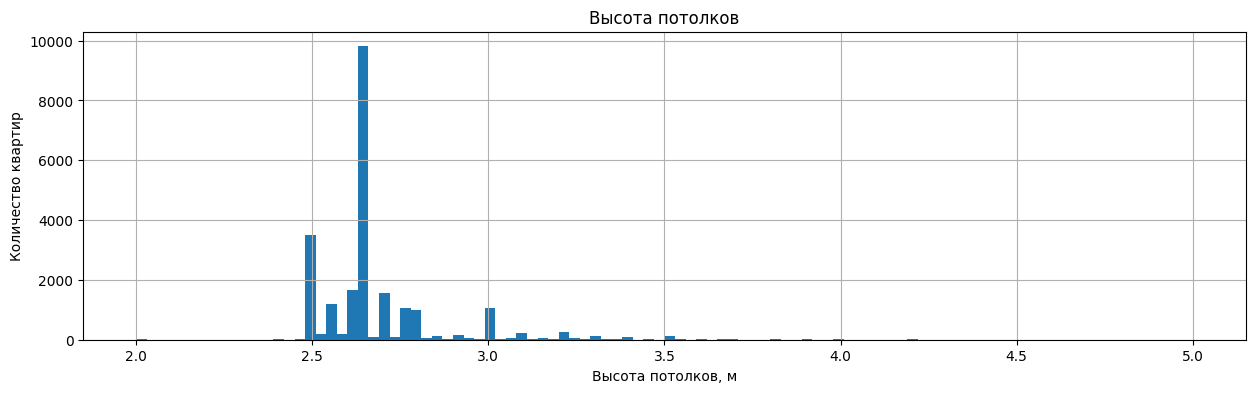

In [77]:
# построим гистограмму
data.plot(
    kind='hist',
    y='ceiling_height',
    bins=100,
    grid=True,
    figsize=(15,4),
    title='Высота потолков',
    xlabel='Высота потолков, м',
    ylabel='Количество квартир',
    legend=False,
    range=(2, 5)
);

Посмотрим на распределение данных по хвостам графика.

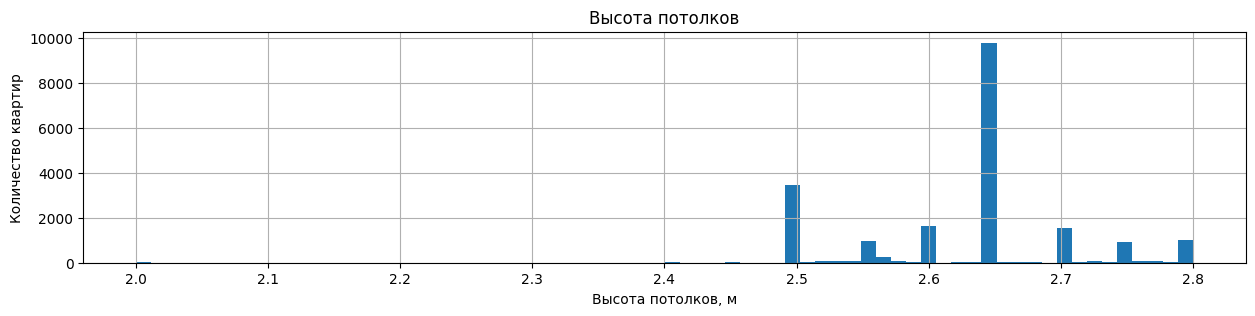

In [78]:
(
    data.ceiling_height
    .hist(bins = 70, figsize = (15,3), range = (2,2.8))
    .set(xlabel = 'Высота потолков, м', ylabel = 'Количество квартир', title = 'Высота потолков')
);

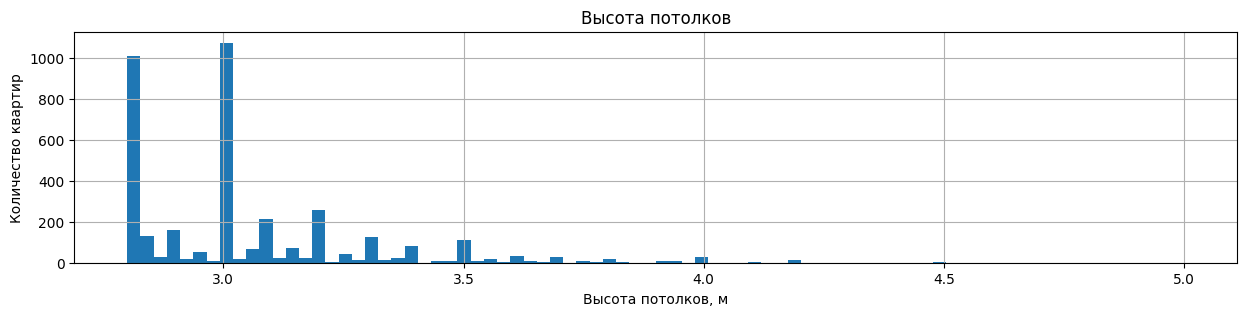

In [79]:
(
    data.ceiling_height
    .hist(bins = 80, figsize = (15,3), range = (2.8,5))
    .set(xlabel = 'Высота потолков, м', ylabel = 'Количество квартир', title = 'Высота потолков')
);

In [80]:
# получим описание данных
data['ceiling_height'].describe()

count    23216.000000
mean         2.718580
std          0.994954
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Построим диаграмму размаха.

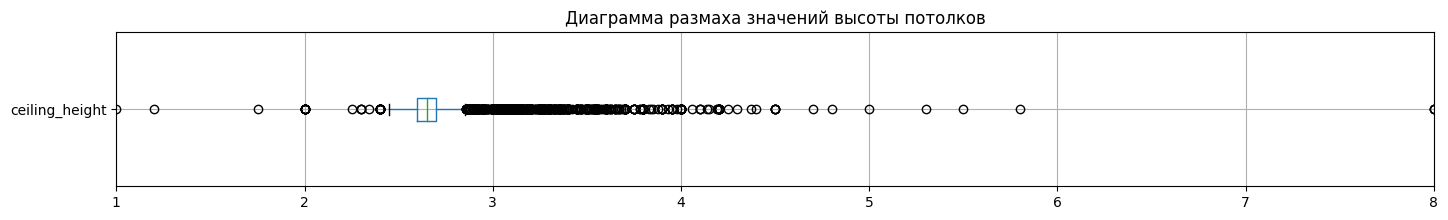

In [81]:
# построим диаграмму размаха
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['ceiling_height']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений высоты потолков')
ax.set_xlim(1, 8);

Чаще всего высота потолков в квартире 2.6-2.7 м, редко принимает другие значения. Минимальное значение - 1 м, максимальное - 100 м. Можно предположить, что большие значения могут относиться к коммерческим либо к переведенным в статус жилых помещениям. В рамках нащего исследования будем считать аномалиями значения меньше 2.4 м или более 4.5 м.

Определим долю аномальных значений.

In [82]:
((data['ceiling_height'] < 2.4) | (data['ceiling_height'] > 4.5)).mean()

0.0023259820813232254

Доля аномальных значений всего 0,2%. Удалим их из выборки.

In [83]:
data = data.drop(data[(data['ceiling_height'] < 2.4) | (data['ceiling_height'] > 4.5)].index)

***Тип этажа квартиры***

Построим гистограмму для данных о типе этажа квартиры.

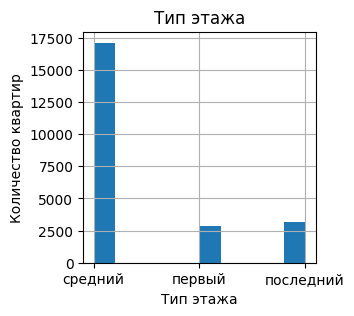

In [84]:
# построим гистограмму
(
    data['floor_type']
    .hist(figsize= (3,3))
    .set(xlabel='Тип этажа', ylabel='Количество квартир',  title='Тип этажа')
);

Количество данных о квартирах, расположенных на первом или последних этажах намного меньше, чем других вариантов. Число объявлений о квартирах на последнем этаже немного превышает число объявлений о квартирах на первом этаже.

***Общее количество этажей в доме***

Построим гистограмму для данных о количестве этажей в доме.

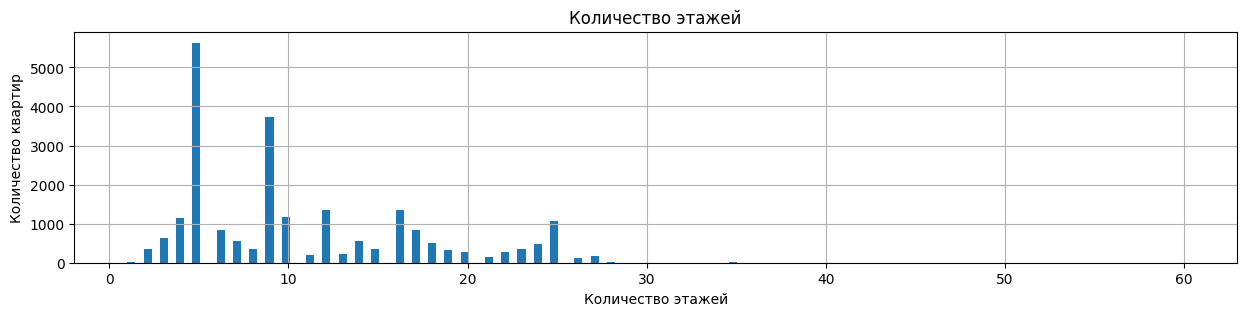

In [85]:
# построим гистограмму
(
    data['floors_total']
    .hist(bins=130, figsize=(15,3))
    .set(xlabel='Количество этажей', ylabel='Количество квартир',  title='Количество этажей')
);

In [86]:
# получим описание данных
data['floors_total'].describe()

count    23078.000000
mean        10.748158
std          6.604516
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

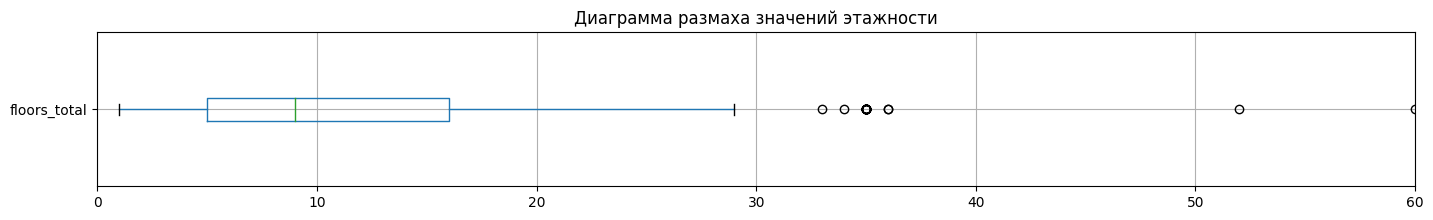

In [87]:
# построим диаграмму размаха
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['floors_total']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений этажности')
ax.set_xlim(0, 60);

In [88]:
# вычислим долю квартир, расположенных в объектах этажностью больше 28
(data['floors_total'] > 28).mean()

0.0013383991019773767

Половину данных составляют объявления о продаже квартир в домах с общим числом этажей от 5 до 16. На гистограмме видны 2 самых больших пика - 5 и 9 этажей, а также несколько меньших пиков - 12, 16, 4, 10, 25  этажей, что вполне обьясняется распространенностью домов такой этажности. Минимальное значение - 1, максимальное - 60. Значения больше 28 очень редкие, их доля составляет 0.1%. Они являются выбросами в данных и их нужно удалить.

In [89]:
data = data.drop(data[data['floors_total'] > 28].index) # удалим объекты, в которых количество этажей больше 28

***Расстояние до центра города***

Построим гистограмму для данных о расстоянии до центра города.

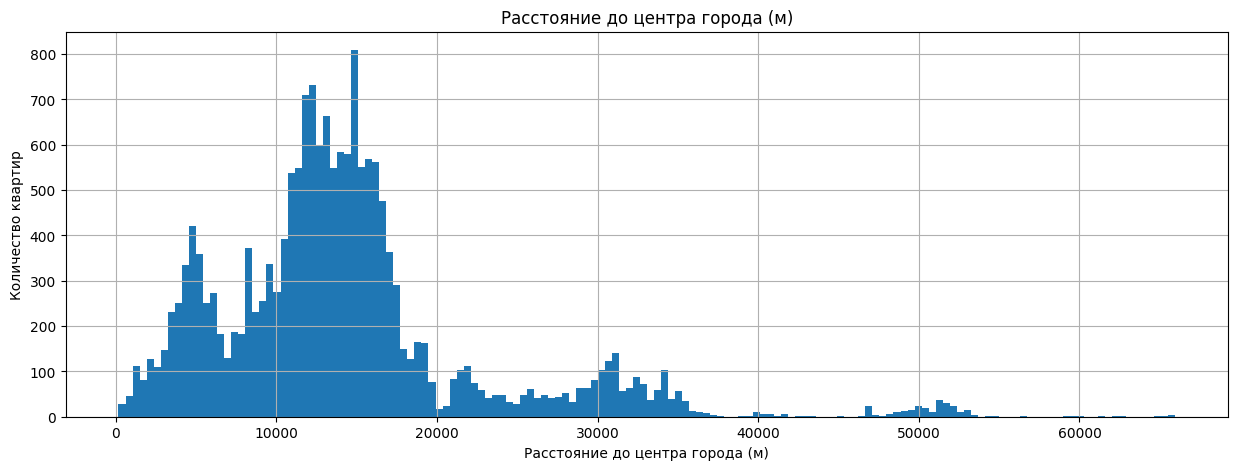

In [90]:
# построим гистограмму
data.plot(
    kind='hist',
    y='city_centers_nearest',
    bins=150,
    grid=True,
    figsize=(15,5),
    title='Расстояние до центра города (м)',
    xlabel= 'Расстояние до центра города (м)',
    ylabel='Количество квартир',
    legend=False
);

In [91]:
# получим описание данных
data['city_centers_nearest'].describe()

count    17686.000000
mean     14322.131630
std       8553.831834
min        181.000000
25%       9520.500000
50%      13184.500000
75%      16336.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Стоит отметить, что в данных о расстоянии до центра города большое количество пропусков, наш анализ основывается только на имеющихся данных. В половине случаев расстояние до центра колеблется от 9520.5 м до 16336.5 м. Максимальное значение - 65968 м, минимальное - 181 м.

***Расстояние до ближайшего парка***

Построим гистограмму для данных о расстоянии до ближайшего парка.

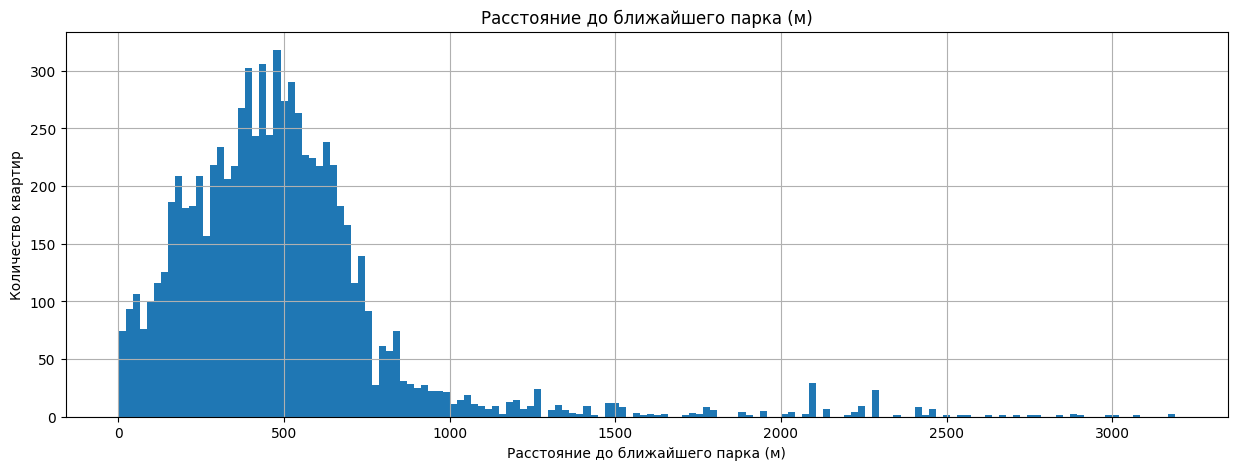

In [92]:
# построим гистограмму
data.plot(
    kind='hist',
    y='parks_nearest',
    bins=150,
    grid=True,
    figsize=(15,5),
    title='Расстояние до ближайшего парка (м)',
    xlabel='Расстояние до ближайшего парка (м)',
    ylabel='Количество квартир',
    legend=False
);

In [93]:
# получим описание данных
data['parks_nearest'].describe()

count    7785.000000
mean      493.458446
std       344.522716
min         1.000000
25%       288.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

В данных о расстоянии до ближайшего парка значительное количество пропусков. Среди объявлений, в которых эти данные имеются, в половине случаев ближайший парк находится в пределах 288 - 614 м, в среднем расстояние составляет около 493,5 м. 
Максимальное значение - 3190 м, минимальное - 1 м.

Проверим, как изменился датасет после удаления дубликатов и выбросов.

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23131 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   total_images                          23131 non-null  int64         
 1   last_price                            23131 non-null  float64       
 2   total_area                            23131 non-null  float64       
 3   first_day_exposition                  23131 non-null  datetime64[ns]
 4   rooms                                 23131 non-null  int64         
 5   ceiling_height                        23131 non-null  float64       
 6   floors_total                          23047 non-null  float64       
 7   living_area                           21270 non-null  float64       
 8   floor                                 23131 non-null  int64         
 9   is_apartment                          23131 non-null  bool          
 10  stu

После удаления дубликатов, редких и аномальных значений сохранилось 23131 строка из 23699, показатель хороший.

#### Исследование количества дней для продажи квартиры

В рамках нашего исследования для изучения времени, которое обычно занимает продажа квартиры, воспользуемся параметром `days_exposition`. Этот параметр показывает, сколько дней было размещено каждое объявление. Стоит отметить, что снятие объявления не всегда означает факт продажи.

Построим гистограмму, диаграмму размаха и получим описание данных столбца `days_exposition`.

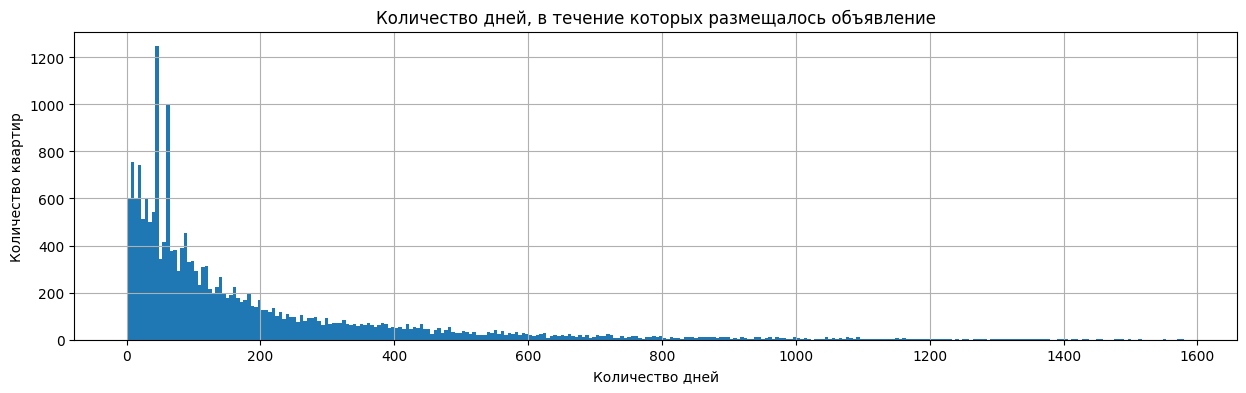

In [95]:
# построим гистограмму
data.plot(
    kind='hist',
    y='days_exposition',
    bins=300,
    grid=True,
    figsize=(15,4),
    title='Количество дней, в течение которых размещалось объявление',
    xlabel='Количество дней',
    ylabel='Количество квартир',
    legend=False
);

Повторим построение гистограммы для выявления пиковых значений

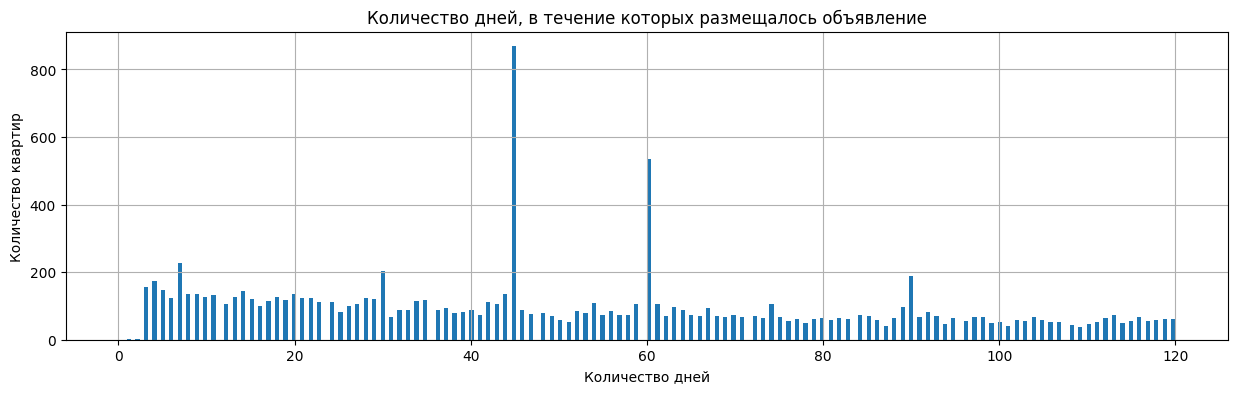

In [96]:
# построим гистограмму 
data.plot(
    kind='hist',
    y='days_exposition',
    bins=250,
    grid=True,
    figsize=(15,4),
    title='Количество дней, в течение которых размещалось объявление',
    xlabel='Количество дней',
    ylabel='Количество квартир',
    legend=False,
    range=(0,120)
);

In [97]:
# получим описание данных
data['days_exposition'].describe()

count    20061.000000
mean       179.503365
std        218.266564
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

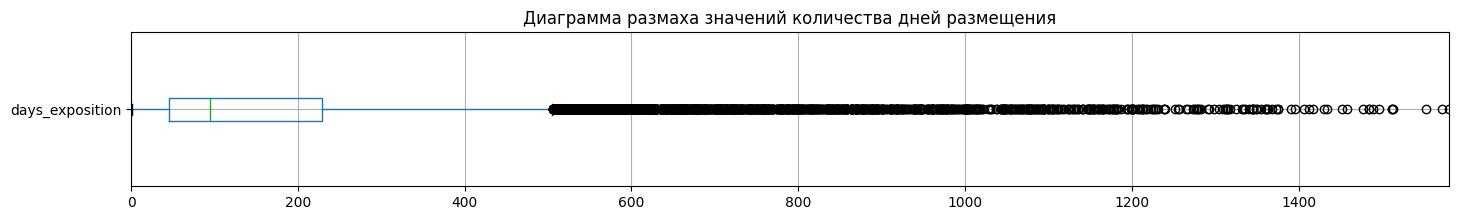

In [98]:
# построим диаграмму размаха
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['days_exposition']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений количества дней размещения')
ax.set_xlim(0, 1580);

In [99]:
# вычислим верхнюю границу нормы
# Q3+1.5*IQR
upper_limit_of_days = data['days_exposition'].quantile(0.75) + 1.5 * (
    data['days_exposition'].quantile(0.75) - data['days_exposition'].quantile(0.25))
upper_limit_of_days

505.0

In [100]:
# вычислим долю значений, превышающих верхнюю границу нормы
(data['days_exposition'] > upper_limit_of_days).mean()

0.07141930742293891

In [101]:
# удалим аномалии в 1,2 дня и более 505
data = data.drop(data[(data['days_exposition'] < 3) | (data['days_exposition'] > upper_limit_of_days)].index)
data.shape[0]

21475

Потери после удаления аномалий допустимые (менее 10%).

In [102]:
# вычислим наиболее частые значения дней размещения объявлений
data['days_exposition'].value_counts(ascending=False).head(10)

days_exposition
45.0    868
60.0    536
7.0     227
30.0    204
90.0    189
4.0     174
3.0     155
5.0     148
14.0    143
9.0     136
Name: count, dtype: int64

На графике прослеживаются самые популярные значения количества дней размещения объявлений: 45, 60, 7, 30, 90. Появление пиков можно объяснить правилами сервиса. Согласно правилам, в настоящее время сроки публикации объявлений о продаже квартир составляют для объектов стоимостью до 4,5 млн - 45 дней, от 4,5 до 10 млн - 60 дней, от 10 млн - 90 дней (действуют по всей России кроме Москвы, Санкт-Петербурга и их областей), 365 дней для бесплатных объявлений и 30 дней для платных (для Москвы, Санкт-Петербурга и их областей). Возможно, отдельные сроки для Москвы, Санкт-Петербурга и их областей были установлены позже, т.к. эти ограничения точно соответсвуют пикам в 30, 45, 60, 90 дней.

Проверим наше предположение. Разделим данные в зависимости от цены объекта на три группы. Установим такие же границы, как и  
в правилах сервиса. Далее получим информацию по объявлениям, срок размещения которых был 45, 60, 90 дней.

In [103]:
def price_categoty(price):
    """
    Функция принимает значение цены и возвращает категорию цены
    до 4,5 млн — "низкая",
    от 4,5 млн до 10 млн — "средняя",
    от 10 млн  — "высокая".

    Параметры:
        price (int или float): цена квартиры

    Возвращает:
        str: Категория цены:
    """
    if price < 4500000:
        return 'низкая'
    elif price >= 4500000 and price < 10000000:
        return 'средняя'
    else:
        return 'высокая'

In [104]:
data['price_category'] = data['last_price'].apply(price_categoty) # добавим столбец с категориями цен

In [105]:
#  построим сводную таблицу для объявлений, которые были размещены 45, 60 и 90 дней
(
    data[round(data['days_exposition']).isin([45, 60, 90])]
    .groupby(['days_exposition', 'price_category'])
    .agg({'days_exposition': {'count'}})
)

days_exposition
                                         count
days_exposition price_category                
45.0            высокая                      4
                низкая                     819
                средняя                     45
60.0            высокая                      5
                низкая                      40
                средняя                    491
90.0            высокая                    134
                низкая                      30
                средняя                     25

In [106]:
# вычислим, какую долю данных составляют эти значения
data[round(data['days_exposition']).isin([45, 60, 90])].shape[0]/data.shape[0]

0.07417927823050058

Из таблицы видно, что наше предположение полностью подтверждается, так как основную долю объявлений, снятых на 45, 60 и 90 день, составляют объявления о квартирах низкой, средней и высокой ценовой категориях соответственно. Однако стоит учитывать, что некоторые квартиры действительно могли быть проданы в этот срок. 
Доля объявлений, снятых на 45, 60 и 90 день, составляет 7.4%. Отсутствуют критерии для определения данных об объявлениях, снятых в результате истечения срока публикации.


Построим график изменения скорости продаж по годам (опираемся на то, сколько дней было опубликовано объявление).

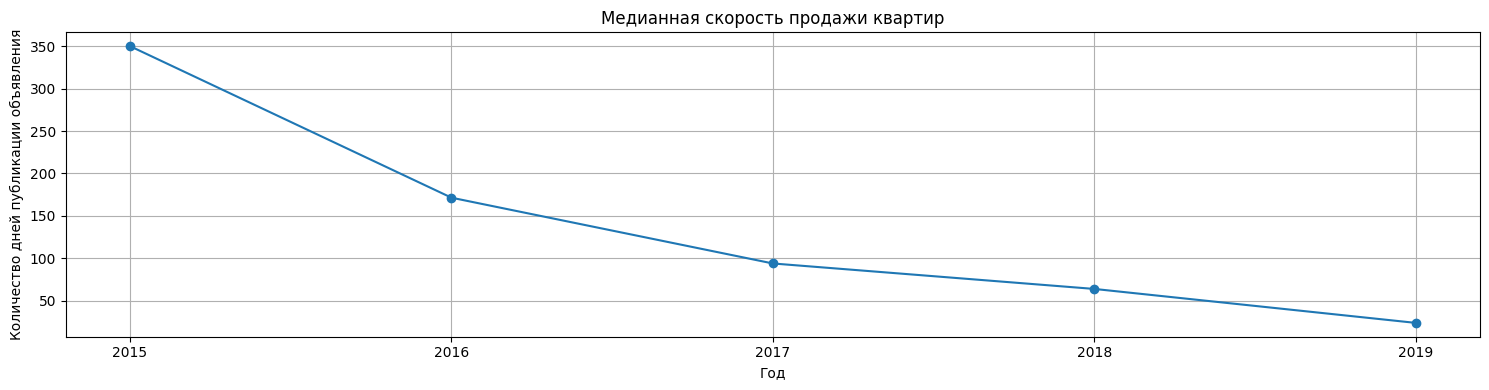

In [107]:
# построим график зависимости скорости продаж от года публикации объявления
# предварительно построим сводную таблицу с группировкой по году публикации
pivot = data.pivot_table(
    index='first_day_exposition_year',
    values='days_exposition',
    aggfunc='median'
)
ax = pivot.plot(
    style='o-',
    grid=True,
    figsize=(15,4),
    title='Медианная скорость продажи квартир',
    xlabel='Год',
    ylabel='Количество дней публикации объявления',
    legend=False
)

ax.set_xticks(range(2015, 2020))
plt.tight_layout()
plt.show()

Среднее время размещения объявления - 180 дней, медианное - 95 дней. 50% объявлений размещаются на срок 45-229 дней. Допустив, что объявления снимались из-за совершения сделок (т.к. отсутствуют критерии для фильтрации), продажи менее чем за 45 дней можно считать быстрыми, а более 229 дней -  долгими. Согласно диаграмме размаха, верхняя граница нормы - 505 дней. Продажи более 505 дней являются необычайно долгими, их доля составляет 7,1%. _На границы отнесения продаж к быстрым либо долгим могли оказать влияние объявления, снятые в результате истечения сроков публикации. Для вычисления более точных значений необходимо добавить к данным параметр, позволяющий выделить такие объявления среди остальных._ Наблюдается снижение медианной скорости продажи квартир, резкое c 2015 по 2016, более плавное с 2016 по 2019 годы. Это может быть связано с тем, что во время кризисов и нестабильных ситуаций люди стараются найти правильное вложение для своих сбережений. Заметим, что в статистике нет данных о непроданных квартирах (более 3000).

#### Исследование факторов, влияющих на полную стоимость квартиры

Полную стоимость объекта отражает параметр 'last_price', который является целевым признаком.

Исследуем, зависит ли цена от общей площади квартиры.

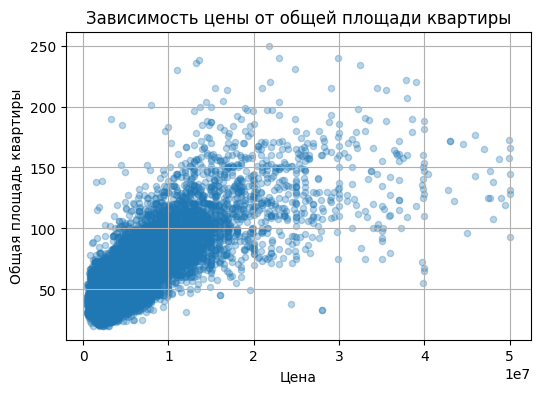

In [108]:
# построим график зависимости цены от площади квартиры
data.plot(x='last_price', y='total_area', kind='scatter', grid=True,\
          figsize=(6,4), title='Зависимость цены от общей площади квартиры',  alpha=0.3,
          xlabel='Цена', ylabel='Общая площадь квартиры');

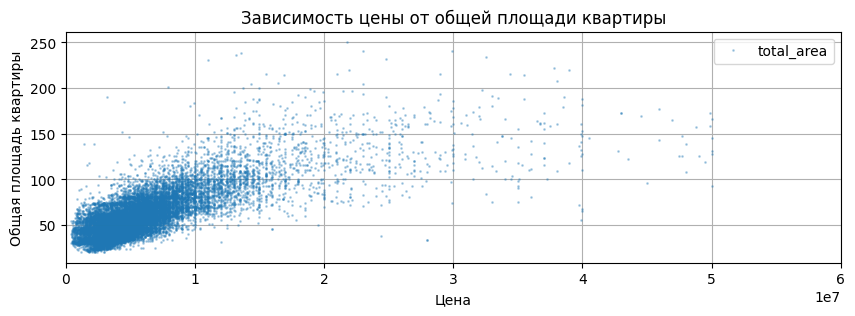

In [109]:
# построим график зависимости цены от площади квартиры
data.plot(x='last_price', y='total_area', style='o', grid=True, markersize=1,
          figsize=(10,3), title='Зависимость цены от общей площади квартиры',  alpha=0.3, xlim=(0, 60000000),
          xlabel='Цена', ylabel='Общая площадь квартиры');

In [110]:
# вычислим коэффициент кореляции Пирсона
data['total_area'].corr(data['last_price'])

0.7602466805642877

Коэффициент корреляции 0.76 указывает на наличие зависимости между величинами. Для квартир большей площадью стоимость выше.

Исследуем, зависит ли цена от жилой площади квартиры.

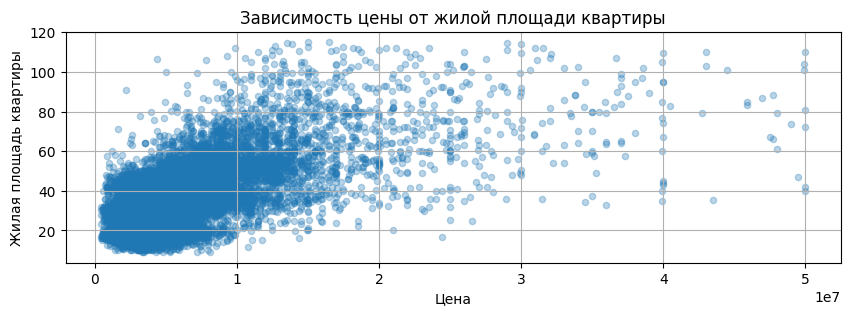

In [111]:
# построим график зависимости цены от жилой площади квартиры
data.plot(x= 'last_price', y='living_area', kind='scatter', grid=True,
          figsize=(10,3), title='Зависимость цены от жилой площади квартиры',  alpha=0.3, 
          xlabel='Цена', ylabel='Жилая площадь квартиры');

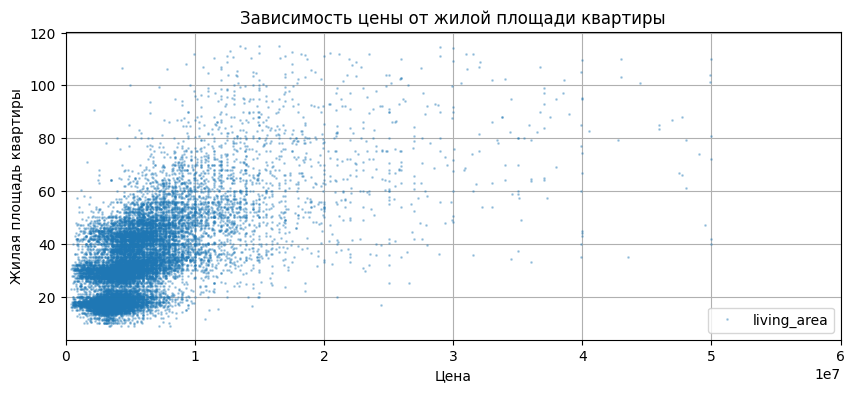

In [112]:
# построим график зависимости цены от жилой площади квартиры
data.plot(x='last_price', y='living_area', style='o', grid=True,\
          figsize=(10,4), title='Зависимость цены от жилой площади квартиры',  alpha=0.3, markersize=1, xlim=(0, 60000000),
          xlabel='Цена', ylabel='Жилая площадь квартиры');

In [113]:
# вычислим коэффициент кореляции Пирсона
data['living_area'].corr(data['last_price'])

0.6463006325970165

Коэффициент корреляции 0.65, значит небольшая зависимость между величинами существует. Для квартир с большей жилой площадью чаще характерна более высокая стоимость.

Изучим зависимость между площадью кухней и ценой. Построим график зависимости цены от площади кухни, а также вычислим коэффициент Пирсона.

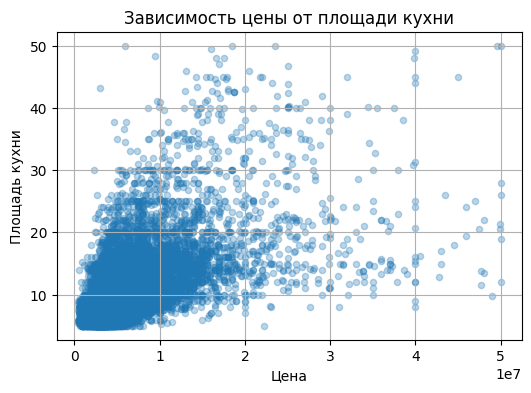

In [114]:
# построим график зависимости цены от площади кухни квартиры
data.plot(x= 'last_price', y='kitchen_area', kind='scatter', grid=True,\
          figsize=(6,4), title='Зависимость цены от площади кухни',  alpha=0.3,
          xlabel='Цена', ylabel='Площадь кухни');

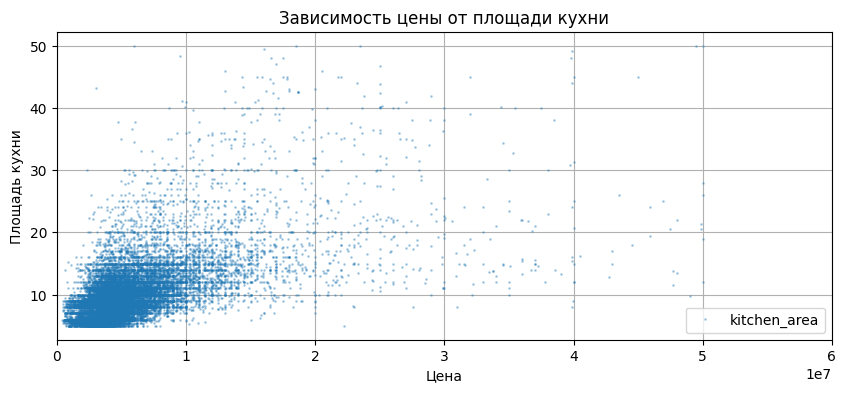

In [115]:
# построим график зависимости цены от площади кухни квартиры
data.plot(x= 'last_price', y='kitchen_area', style='o', grid=True, markersize=1, xlim= (0, 60000000),
          figsize=(10,4), title='Зависимость цены от площади кухни',  alpha=0.3,
          xlabel='Цена', ylabel='Площадь кухни');

In [116]:
#  вычислим коэффициент кореляции Пирсона
data['kitchen_area'].corr(data['last_price'])

0.5823719982052453

Коэффициент корреляции 0.59 указывает на небольшую зависимость между величинами. Для квартир с большей площадью кухни стоимость немного выше.

Изучим, как количество комнат влияет на стоимость квартиры. 

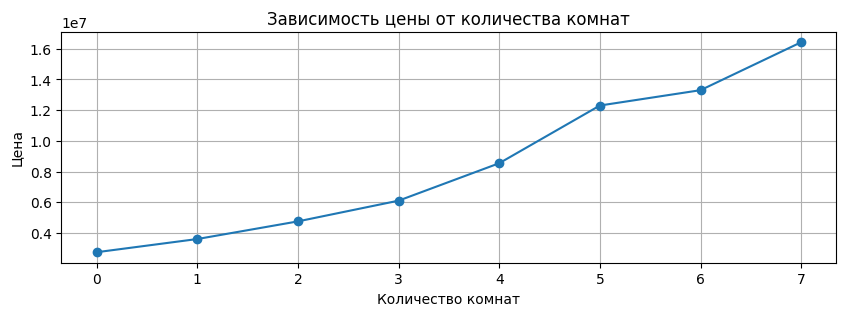

In [117]:
# построим график зависимости цены от количества комнат квартиры
# предварительно построим сводную таблицу с группировкой по количеству комнат
(
    data.pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(style='o-', grid=True, figsize=(10,3), title='Зависимость цены от количества комнат',
          xlabel='Количество комнат', ylabel='Цена', legend=False)
);

In [118]:
#  вычислим коэффициент кореляции Пирсона
data['rooms'].corr(data['last_price'])

0.45996892827396574

Коэффициент кореляции 0.46 указывает на наличие небольшой зависимости между величинами. На графике видно, что с увеличением количества комнат растет медианная стоимость квартиры.

Изучим, как тип этажа, на котором находится квартира, влияет на её стоимость.

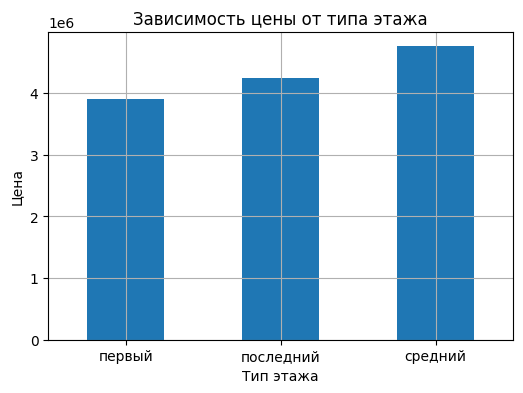

In [119]:
# построим столбчатый график зависимости цены от типа этажа квартиры
# предварительно построим сводную таблицу с группировкой по типу этажа
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(kind='bar', grid=True, figsize=(6,4), title='Зависимость цены от типа этажа',
          xlabel='Тип этажа', ylabel='Цена', legend=False, rot=0)
    
);

Cтоимость квартиры зависит от этажа: на первом этаже квартиры стоят дешевле всего, чуть дороже - квартиры на последнем этаже, самая высокая стоимость у квартир, расположенных не на первом и не на последнем этажах.

Определим, оказывает ли влияние дата размещения квартиры на ее стоимость. Построим графики зависимости цены от даты размещения квартиры, а именно дня недели, месяца, года. 

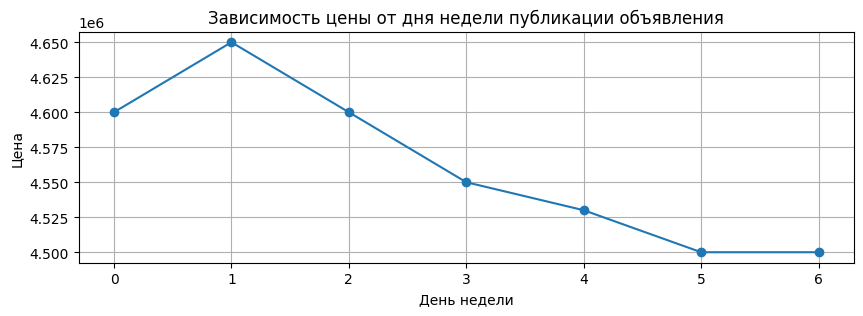

In [120]:
# построим график зависимости цены от дня недели публикации объявления
# предварительно построим сводную таблицу с группировкой по дню недели
(
    data.pivot_table(index='first_day_exposition_day_of_the_week', values='last_price', aggfunc='median')
    .plot(style='o-', grid=True, figsize=(10,3), title='Зависимость цены от дня недели публикации объявления',
          xlabel='День недели', ylabel='Цена', legend=False)    
);

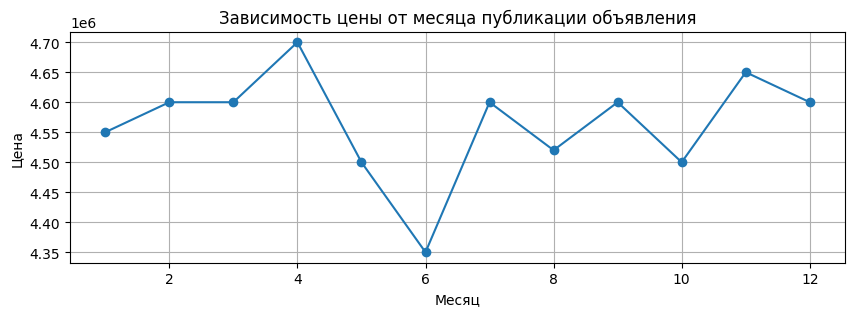

In [121]:
# построим график зависимости цены от месяца публикации объявления
# предварительно построим сводную таблицу с группировкой по месяцу публикации
(
    data.pivot_table(index='first_day_exposition_mounth', values='last_price', aggfunc='median')
    .plot(style='o-', grid=True, figsize=(10,3), title='Зависимость цены от месяца публикации объявления',
          xlabel='Месяц', ylabel='Цена', legend=False)    
);

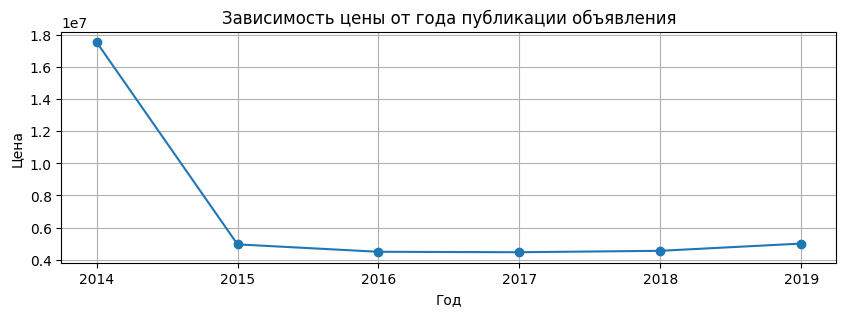

In [122]:
# построим график зависимости цены от года публикации объявления
# предварительно построим сводную таблицу с группировкой по году публикации
(
    data.pivot_table(index='first_day_exposition_year', values='last_price', aggfunc='median')
    .plot(style='o-', grid=True, figsize=(10,3), title='Зависимость цены от года публикации объявления',
          xlabel='Год', ylabel='Цена', legend=False)    
);

In [123]:
# вычислим коэффициент кореляции Пирсона
data['first_day_exposition_year'].corr(data['last_price'])

-0.0062103721294179655

Дороже всего квартиры, опубликованные во вторник и понедельник/среду, чуть дешевле - в четверг, со вторника до воскресенья наблюдается спад. Возможно, это связано с поведенческими особенностями людей, более серьезным деловым настроением в начале рабочей недели. 

Самые большие цены в объявлениях, опубликованных в апреле, самые маленькие - в мае/октябре и июне. Это может быть связано с началом летнего отпускного периода, когда деловая активность людей падает.

Линейной связи между годом публикации объявления и ценой нет. Возможное падение цен на квартиры можно связать с кризисом в 2014—2015 годах, дальнейший медленный рост - с постепенным восстановлением экономики. Однако стоит учесть другие изменяющиеся с течением времени факторы, которые могли оказать влияние на цену.

Как мы установили выше, существует взаимосвязь между ценой квартиры и общей площадью. Также стоит обратить внимание на количество объявлений, размещенных в течение года. Построим таблицу, содержащую сведения о количестве объявлений и медианной цене в течение лет, а также графики для наглядности.

In [124]:
(
    data
    .groupby('first_day_exposition_year')
    .agg(
        count=('total_area', 'count'),
        last_price=('last_price', 'median'),
        total_area=('total_area', 'median')
    )
    .style.format({'last_price': '{:.0f}', 'total_area': '{:.2f}'})
)

,count,last_price,total_area
first_day_exposition_year,,,
2014,18,17525000,109.20
2015,517,4950000,58.00
2016,2115,4490000,53.00
2017,7670,4462500,51.00
2018,8347,4550000,50.20
2019,2808,5000000,51.55


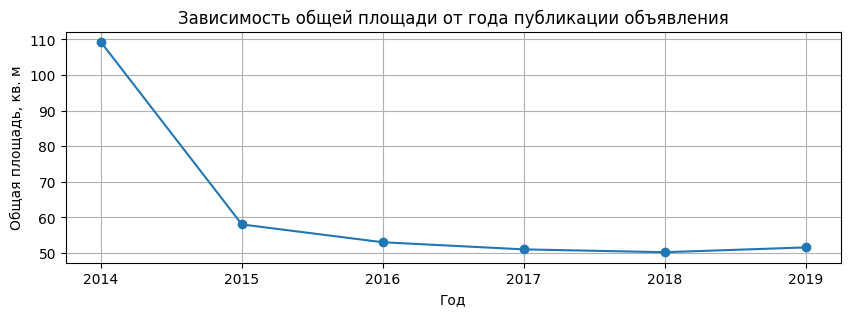

In [125]:
# построим график, отражающий медианную общую площадь по годам
(
    data
    .pivot_table(index='first_day_exposition_year', values='total_area', aggfunc='median')
    .plot(style='o-', grid=True, figsize=(10,3), title='Зависимость общей площади от года публикации объявления',
          xlabel='Год', ylabel='Общая площадь, кв. м', legend=False)
);

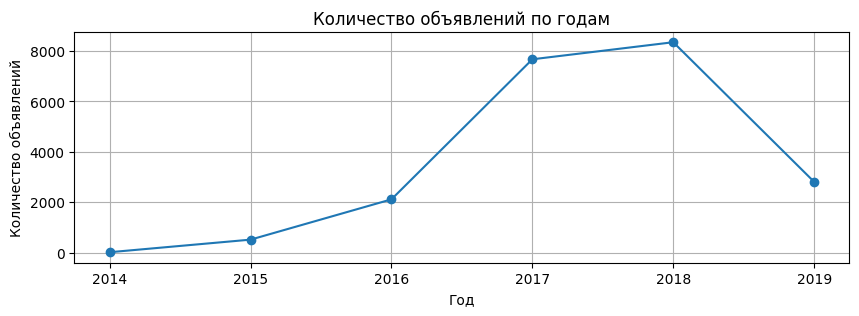

In [126]:
# построим график, отражающий количество объявлений по годам
(
    data
    .pivot_table(index='first_day_exposition_year', values='total_area', aggfunc='count')
    .plot(style='o-', grid=True, figsize=(10,3), title='Количество объявлений по годам',
          xlabel='Год', ylabel='Количество объявлений', legend=False)
);

С 2014 по 2016 год медианное значение площади продаваемых квартир значительно уменьшилось (с 76 кв. м до 53 кв. м), плавно снижалось с 2016 по 2018 год, а затем незначительно выросло в 2019 году. Учитывая положительную корреляцию между ценой и общей площадью, можно сделать вывод, что значительное уменьшение площади предлагаемых квартир повлияло на снижение медианной цены. Резкое снижение количества объявлений практически в 3 раза (низкое предложение) в 2019 могло стать причиной роста цен.

Промежуточный вывод:
- на полную стоимость квартиры оказывает влияние общая площадь, небольшое влияние - жилая площадь и площадь кухни, в меньшей степени - количество комнат;
- на первом этаже квартиры стоят дешевле всего, чуть дороже - квартиры на последнем этаже, самая высокая стоимость у квартир, расположенных не на первом и не на последнем этажах;
- дороже всего квартиры, информация о продаже которых опубликована во вторник, дешевле всего - в субботу и воскресенье;
- самые большие цены в объявлениях, опубликованных в апреле, самые низкие - в мае, октябре и июне;
- с 2014 по 2016 год стоимость квартир резко снизилась, небольшой рост наблюдается с 2017 по 2019 год. Снижение стоимости может быть обусловлено аналогичным изменением медианной площади продаваемых квартир в этот период, небольшой рост в 2019 году - резким снижением количества предложений.   

#### Анализ стоимости квадратного метра десяти населённых пунктов с наибольшим числом объявлений

Построим сводную таблицу с количеством объявлений и средней ценой за квадратный метр.

In [127]:
pivot_data = (data
 .groupby('short_locality_name') # группируем по населенному пункту
 .agg(count_of_ads=('last_price', 'count'), 
      average_price=('price_per_square_meter', 'mean')) # считаем количество объявлений и ср. цену за кв. метр
 .sort_values(by='count_of_ads', ascending=False) # сортируем по убыванию количества объявлений
)

Изучим информацию о 10 населённых пунктах с наибольшим числом объявлений.

In [128]:
top_ads = pivot_data.head(10).sort_values(by='average_price', ascending=False) # выводим первые 10 строк
top_ads.style.format({"average_price": "{:.2f}"})

,count_of_ads,average_price
short_locality_name,,
САНКТ-ПЕТЕРБУРГ,14117,111872.18
ПУШКИН,333,102868.57
КУДРОВО,436,95562.45
ПАРГОЛОВО,311,89898.84
МУРИНО,549,86174.93
ШУШАРЫ,414,78429.31
КОЛПИНО,323,75247.37
ГАТЧИНА,278,69017.53
ВСЕВОЛОЖСК,366,68761.37


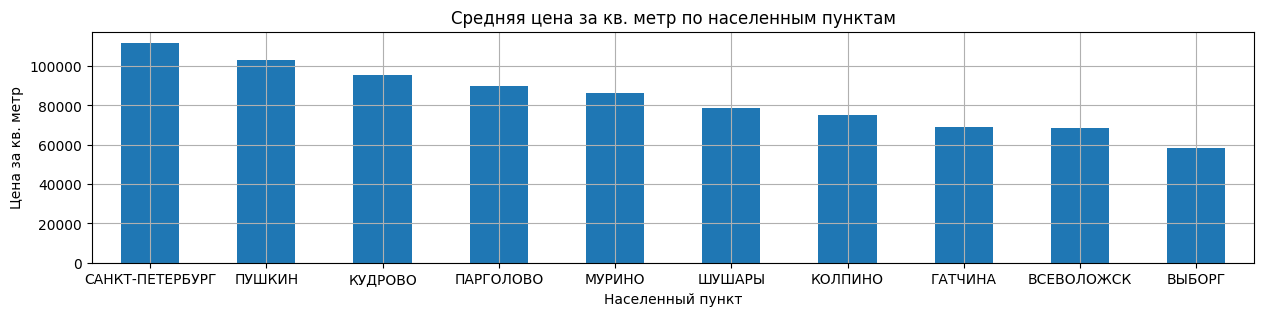

In [129]:
#  построим столбчатый график зависимости цены за кв. метр от населенного пункта
top_ads.plot(
    y='average_price', kind='bar', grid=True, figsize=(15,3), title='Средняя цена за кв. метр по населенным пунктам',
    xlabel='Населенный пункт', ylabel='Цена за кв. метр', legend=False, rot=0);

Наибольшее количество объявлений по продаже объектов в г.Санкт-Петербург - 14117, что значительно превышает остальные значения из списка, в остальных населенных пунктах количество объявлений колеблется в пределах 219-549. 
Самая высокая стоимость квадратного метра в г.Санкт-Петербург - 111872, за ним идет г.Пушкин - 102869. Самая низкая стоимость в Выборге - 58304, и Всеволожске - 68761.

#### Анализ изменения цены квадратного метра в Санкт-Петербурге

Проанализирем, как влияет удаленность от центра на стоимость квартир в Санкт-Петербурге. 

Построим сводную таблицу, содержащую среднюю стоимость за квадратный метр в зависимости от расстояния, а также график изменения средней цены для каждого километра от центра Петербурга.

In [130]:
pivot_table_spb = (data
 .query('short_locality_name == "САНКТ-ПЕТЕРБУРГ"') # фильтруем данные по Санкт-Петербургу
 .pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
)
pivot_table_spb.index = pivot_table_spb.index.map('{:.0f}'.format)
pivot_table_spb.style.format({'last_price': '{:,.2f}'})

,last_price
city_centers_nearest_km,
0,"17,498,894.74"
1,"12,445,530.30"
2,"11,768,641.67"
3,"9,777,917.01"
4,"10,564,043.76"
5,"11,271,052.82"
6,"10,869,080.11"
7,"10,848,901.21"
8,"8,794,577.84"


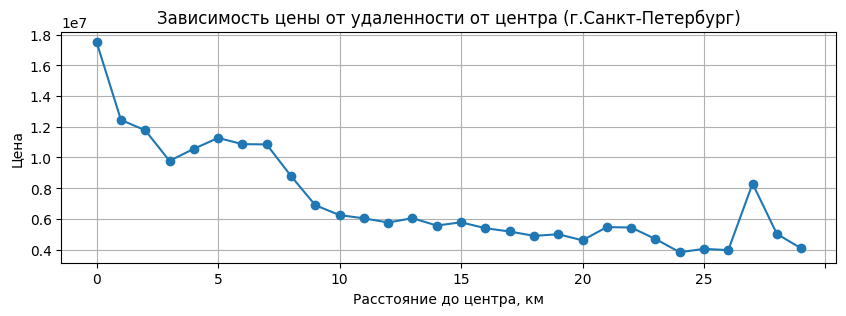

In [131]:
# построим график зависимости цены от удаленности от центра
pivot_table_spb.plot(grid=True, figsize=(10,3), style='o-',
                     title='Зависимость цены от удаленности от центра (г.Санкт-Петербург)',
                     xlabel='Расстояние до центра, км', ylabel='Цена', legend=False);

Наибольшая зависимость между величинами наблюдается при расстоянии до 9 км. Самые дорогие квартиры расположены в центре и не далее 2 км от центра. Также видим пик значений в районе 27 км (может быть обусловлен какими-то другими факторами: состоянием квартиры, непосредственным расположением квартиры - близость к метро, другим объектам, и т.д.). Средние значения цен на квартиры в диапазоне до 9 км гораздо выше остальных. После 9 км график становится более пологим, значения изменяются плавно. 

Рассмотрим подробнее квартиры, расположенные на расстоянии 27 км от центра.

In [132]:
data[(data['city_centers_nearest_km'] == 27) & (data['short_locality_name'] == "САНКТ-ПЕТЕРБУРГ")].sort_values(by='last_price', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,short_locality_name,price_per_square_meter,first_day_exposition_day_of_the_week,first_day_exposition_mounth,first_day_exposition_year,floor_type,city_centers_nearest_km,price_category
748,13,14350000.0,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,...,NaN,128.0,САНКТ-ПЕТЕРБУРГ,193918.92,1,11,2017,средний,27.0,высокая
5961,6,2250000.0,32.0,2018-02-27,1,2.65,2.0,16.5,2,False,...,NaN,178.0,САНКТ-ПЕТЕРБУРГ,70312.50,1,2,2018,последний,27.0,низкая


Как видим, в данных всего 2 квартиры, одна из которых из низкой, другая - из высокой ценовой категории. Именно это и повлияло на величину медианы и вызвало появление выброса на 27 км.

Рассмотрим подробнее данные о квартирах, расположенных на расстоянии 3-7 км от центра. 

In [133]:
# Выполним группировку и подсчет количества значений
grouped_data = (
    data[
        (data['city_centers_nearest_km'].isin([1, 2, 3, 4, 5, 6, 7])) & 
        (data['short_locality_name'] == "САНКТ-ПЕТЕРБУРГ")
    ]
    .groupby(['city_centers_nearest_km', 'price_category'])
    .agg(count=('last_price', 'size'))
    .reset_index()
)

# Приводим к типу int, чтобы получить красивое отображение индексов в результирующей таблице
grouped_data['city_centers_nearest_km'] =  grouped_data['city_centers_nearest_km'].astype(int)

# Посчитаем общее количество значений в каждой группе
group_totals = grouped_data.groupby('city_centers_nearest_km')['count'].transform('sum')

# Разделим количество значений каждого типа на общее количество значений в группе
grouped_data['percentage'] = grouped_data['count'] / group_totals * 100

# Сгруппируем полученный результат по city_centers_nearest_km и price_category
final_grouped_data = grouped_data.groupby(['city_centers_nearest_km', 'price_category']).agg({'count': 'sum', 'percentage': 'sum'})

final_grouped_data.style.format({'count': '{:,.0f}', 'percentage': '{:.2f}'})

Доля категорий квартир с более дешевой стоимостью больше на третьем километре, чем на пятом, что является одной из причин падения стоимости на этом расстоянии.

### Вывод

Для проведения данного исследования использовались данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

Во время предобработки данных было обнаружено большое количество пропущенных значений. Пропуски в данных о количестве балконов заполнены нулевыми значениями, пропуски в данных о том, является ли недвижимость аппартаментами, заменены на False. Пропуски в данных о высоте потолков заполнены медианным значением. Пропущенные названия населенных пунктов заполнены значением 'unknown'. Пропуски в данных о количестве этажей в доме, жилой площади, площади кухни, а также в данных, автоматически получаемых из геосервисов, не заполнялись. Пропуски в данных, которые должны были быть получены автоматически, могли возникнуть по техническим причинам (во время выгрузки данных, копирования, считывания, сохранения информации) либо из-за проблемы при работе с геосервисами. Пропуски в данных, получаемых от пользователя, могут быть вызваны как техническим причинам, так и человеческим фактором (случайное либо намеренное оставление необязательных полей пустыми, и т.д.).

Данные о количестве балконов приведены к целочисленному типу, данные о дате публикации - к типу datetime.
Данные проверены на наличие дубликатов. Для устранения неявных дубликатов добавлен столбец, содержащий названия населенных пунктов, записанные в верхнем регистре, без указания типа населенного пункта, для единообразия написания все 'ё' заменены на 'е'. Удалены дубликаты, выявленные по сумме ключевых параметров.
Добавлены новые столбцы: цена одного квадратного метра; день недели, месяц, год  публикации объявления; тип этажа квартиры;
 расстояние до центра города в километрах.

Проанализированы параметры: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, тип этажа квартиры, общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего парка. Обнаруженные аномалии удалены из выборки. 

В результате анализа данных выявлено:
- Среднее время продажи квартиры - 180 дней, медианное - 95 дней. Продажи менее чем за 45 дней можно считать быстрыми, а более 229 дней - долгими. Для исследования принимали, что факт снятия объявления означает факт продажи, что не всегда соответствует действительности. На границы отнесения продаж к быстрым либо долгим могли оказать влияние объявления, снятые в результате истечения сроков публикации. Для вычисления более точных значений необходимо добавить к данным параметр, позволяющий выделить такие объявления среди остальных. Наблюдается снижение медианной скорости продажи квартир, резкое c 2014 по 2016, более плавное с 2016 по 2019 годы.

- На полную стоимость квартиры оказывает влияние общая площадь, небольшое влияние - жилая площадь и площадь кухни, в меньшей степени - количество комнат. На первом этаже квартиры стоят дешевле всего, чуть дороже - квартиры на последнем этаже, самая высокая стоимость у квартир, расположенных не на первом и не на последнем этажах. Дороже всего квартиры, информация о продаже которых опубликована во вторник и среду, дешевле всего - в субботу и воскресенье. Самые большие цены в объявлениях, опубликованных в апреле, самые низкие - в мае, октябре и июне. Линейной связи между годом публикации объявления и ценой нет. С 2014 по 2016 год стоимость квартир резко снизилась, небольшой рост наблюдается с 2017 по 2019 годы. Снижение стоимости может быть обусловлено аналогичным изменением медианной площади продаваемых квартир в этот период, небольшой рост в 2019 году -  резким снижением количества объявлений.

- Среди 10 населенных пунктов с наибольшим количеством объявлений самая высокая стоимость квадратного метра в г.Санкт-Петербург - 111872, за ним идет г.Пушкин - 102869. Самая низкая стоимость в Выборге - 58304, и Всеволожске - 68761.

- Для г.Санкт-Петербурга наибольшая зависимость между ценой квартиры и удаленностью от  центра города наблюдается при расстоянии до 9 км. Самые дорогие квартиры расположены в центре и не далее 2 км от центра. Средние значения цен на квартиры в диапазоне до 9 км гораздо выше остальных. После 9 км значения изменяются плавно.